# Exploratory Data Analysis - Data Understanding

After developing a business problem it's important to understand the data before doing any curation or model implementation. Our goal is to predict which patients will be diagnosed with diabetes mellitus. In order to do exactly that we have three datasets: 

**TrainingWiDS2021.csv** - The training data, includes 130157 patients and 181 variables, including the target variable, diabetes mellitus.

**UnlabeledWiDS2021.csv** - the unlabeled data (data without diabetes_mellitus provided, which is the target variable). 

**DataDictionaryWiDS2021.csv** - supplemental information about the data, and each variable.



Below, a summary for the structure followed by the notebook : 

    
    
**1. Data Dictionary Interpretation**

In this step we conclude that there are 7 types of variables:
- Identifier
- Demographic 
- Labs
- Labs blood gas
- Vitals
- APACHE covariate
- APACHE comorbidity
    
Then we did an overall analysis on **duplicates**, **target variable distribution** and **missing values**. 
- Zero duplicates in the dataset.
- From the 130157 patients in the training set, 28151 have diabetes mellitus.    


</div>
  
Next we start by analyzing each category regarding the following : **Data Quality verification**, where it's possible to find information about missing values and the value of each variable; **Data description**, with the main statistics; **Correlation** has information regarding the behaviour and relation between variables; In **Data Exploration** we can find a detailed analysis about the main varaible in each category. 


    
    
    
**2. Demographic**

There are **16 demographic variables**. These variables refers to socioeconomic information expressed statistically like for example: age, ethnicity, gender and height. It's also possible to find information regarding the icu admission like: cu_admit_source and icu_stay_type.

</div>

        
The following variables categories, since they are all about health, the data Quality verification and Exploration was done at the same time. 
    

    
**3. Labs**

There are **59 labs variables.**  Most of the variables are the max and min value of the same variable and also the value of first hour and first 24 hours. We noticed a **high correlation between the "first 24 hours" and "first hour"** values for the same lab's sign, this indicates that the first hour usually corresponds to the average value of the same day.
    
Effectively, we can see that the **levels of glucose are highly correlated with the contraction of diabetes**. Although some people with normal blood glucose levels can also be diagnosed with diabetes mellitus, there is a much higher probability when the glucose levels are higher than recommended.

</div>
   
   

**4. Labs Blood Gas**
    
These **15 variables** are mostly information about the blood levels of the patients. We noticed a **high correlation between the "first 24 hours" and "first hour"** values for the same lab's sign, this indicates that the first hour usually corresponds to the average value of the same day.
    
</div>
   


**5. Vitals**
    
There are **51 vitals variables**.
There is a negative correlation between the `bmi bin` and the `heartrate`, meaning that **younger people can have a higher heart rate**; as well as between the `age bin` and the `diasbp`, which is used to calculate the blood pressure. 

</div>



**6. APACHE covariate**
    
APACHE (acute physiology and chronic health evaluation) is a severity-of-illness classification system for describing groups of intensive care unit (ICU) patients and evaluating their care. There are **27 variables in this category.** We conclude that the rate of diabetes mellitus contraction is **much higher for those who have contracted diabetic ketoacidosis** than for the ones who haven't.

</div>



**7. APACHE comorbidity**
    
APACHE comorbidity evaluates chronic health of each patient. We have **7 variables** and each represents a chronic desease. There seems to be a very low correlation with the positive test for diabetes with the contraction of any of the other diseases. 

</div>
    


# Index   
    
    
    1. Data Dictionary Interpretation
        1.1 IDs and label distribution
        1.2 Missing values overall
        
    2. Demographic
        2.1 Data Quality verification
            2.1.1 Removing unnecessary columns
            2.1.2 Missing Values checking
        2.2 Demographics data description
        2.3 Correlation
        2.4 Data Exploration
            2.4.1 Age, Ethnicity and gender
            2.4.2 Height, weight and bmi
            2.4.3 Combine BMI and age groups
            2.4.4 Hospital and ICU admit source
            2.4.5 Elective Surgery
            2.4.6 Pre ICU days
            
    3. Labs
        3.1 Data Quality verification
            3.1.1 Missing Values Checking**
            3.1.2 Removing unnecessary columns
        3.2 Labs data description
        3.3 Correlation

    4. Labs Blood Gas
        4.1. Data Quality verification
            4.1.1 Missing Values Checking
            4.1.2 Removing unnecessary columns
        4.2 Labs blood gas data description
        4.3 Correlation

    5. Vitals
        5.1 Data Quality verification
            5.1.1 Missing Values Checking
            5.1.2 Removing unnecessary columns
        5.2 Vitals data description
        5.3 Correlation
        
    6. Labs, Labs blood and Vitals: Data Quality verification
        6.1 min > max check
        6.2 d1_min > h1_min or d1_max < h1_max check
        
    7. Labs, Labs blood and Vitals: Data Exploration
        7.1 Correlation
            7.1.1 Labs
            7.1.2 Labs blood gas
            7.1.3 Vitals
            7.1.4 Relate vitals to demographic
            7.1.5 Glucose
            
    8. APACHE covariate
        8.1 Data Quality verification
            8.1.1 Missing Values Checking
            8.1.2 Removing unnecessary columns
        8.2 APACHE Covariate data description
        8.3 Correlation
        8.4 Data Exploration
            8.4.1 Diabetic Ketoacidosis
            8.4.2 Apache and Labs & Vitals

    9. APACHE comorbidity
        9.1 Data Quality verification
            9.1.1 Missing Values Checking
            9.1.2 Removing unnecessary columns
        9.2 APACHE Comorbidity data description
        9.3 Correlation
        9.4 Data Exploration

    10. Relate blood pressure with the demographics and diabetes
    11. Relate heart rate with the demographics and diabetes


## 1. Data Dictionary Interpretation

In [177]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# from pycomp.viz.insights import *

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

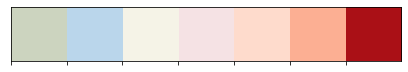

In [178]:
colors = ["#CCD4BF","#bad6eb","#F5F3E7", "#F5E2E4",'#fedbcc',"#fcaf93","#aa1016"]
sns.palplot(sns.color_palette(colors))

In [179]:
data_dic = pd.read_csv("DataDictionaryWiDS2021.csv")

labeled_data = pd.read_csv("TrainingWiDS2021.csv", index_col = 0)
unlabeled_data = pd.read_csv("UnlabeledWiDS2021.csv", index_col = 0)

In [180]:
len(labeled_data)

130157

In [181]:
pd.set_option('display.max_colwidth', None)

display(data_dic)

Category                Variable Name     Unit of Measure  \
0            identifier                 encounter_id                None   
1            identifier                  hospital_id                None   
2           demographic                          age               Years   
3           demographic                          bmi  kilograms/metres^2   
4           demographic             elective_surgery                None   
..                  ...                          ...                 ...   
176  APACHE comorbidity            immunosuppression                None   
177  APACHE comorbidity                     leukemia                None   
178  APACHE comorbidity                     lymphoma                None   
179  APACHE comorbidity  solid_tumor_with_metastasis                None   
180     Target Variable            diabetes_mellitus                None   

    Data Type  \
0     integer   
1     integer   
2     numeric   
3      string   
4      binary   
..        ...   
176    binary   
177    binary   
178    binary   
179    binary   
180    binary   

                                                                                                                                                                                                                                                                                                                 Description  \
0                                                                                                                                                                                                                                                                      Unique identifier associated with a patient unit stay   
1                                                                                                                                                                                                                                                                               Unique identifier associated with a hospital   
2                                                                                                                                                                                                                                                                                   The age of the patient on unit admission   
3                                                                                                                                                                                                                                                                        The body mass index of the person on unit admission   
4                                                                                                                                                                                                                                        Whether the patient was admitted to the hospital for an elective surgical operation   
..                                                                                                                                                                                                                                                                                                                       ...   
176  Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).   
177                                                                                                                                                                           Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.   
178              

We can now understand better how variables are distributed through analyzing **DataDictionaryWiDS2021.csv** . Here are the major conclusions: There are **181 variables** in the dataset, including diabetes_mellitus, the target variable; The variables are divided into 5 categories: identifier, demographic, APACHE comorbidity,

### 1.1 IDs and label distribution

In [182]:
# DUPLICATES
print(labeled_data.duplicated().value_counts())
print(unlabeled_data.duplicated().value_counts())

False    130157
dtype: int64
False    10234
dtype: int64


There are no duplicates in the dataset, each row is unique.

In [183]:
count_patients=len(labeled_data['encounter_id'].unique())

print(f'There are records from {count_patients} patients in the training set')


There are records from 130157 patients in the training set


In [184]:

count_patientstest=len(unlabeled_data['encounter_id'].unique())


print(f'There are records from {count_patientstest} patients in the test set')
      

There are records from 10234 patients in the test set


In [185]:
count_hospitals=len(labeled_data['hospital_id'].unique())

print(f'There are records from {count_hospitals} hospitals in the training set')


There are records from 204 hospitals in the training set


In [186]:
count_hospitalstest=len(unlabeled_data['hospital_id'].unique())

print(f'There are records from {count_hospitalstest} hospitals in the test set')


There are records from 190 hospitals in the test set


*Showl*

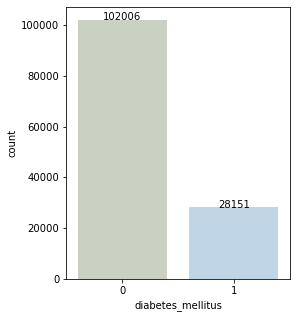

In [187]:
plt.figure(figsize=(4,5))
ax=sns.countplot(labeled_data['diabetes_mellitus'],palette=colors)
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")

From the 130157 patients in the training set, 28151 have diabetes mellitus.

In [188]:
labeled_data['encounter_id']

1         214826
2         246060
3         276985
4         262220
5         201746
           ...  
130153    164758
130154    197653
130155    219719
130156    222562
130157    157942
Name: encounter_id, Length: 130157, dtype: int64

### 1.2 Missing values overall

Like every dataset with real data, there are some missing values. Mostly, these are bits of data that are not present in the final collected data because of data collection or encoding issues. They are not desirable as they skew the analysis and usually end up contributing to unsatisfactory model performance.

To make this understanding easier we split the variables according to the category. 

In [189]:
(labeled_data.isnull().sum().sort_values(ascending=False)).to_frame().style.background_gradient(cmap='Blues')


## 2. Demographics

First, there are 16 demographic variables. These variables refers to socioeconomic information expressed statistically like for example: age, ethnicity, gender and height. It's also possible to find information regarding the icu admission like: cu_admit_source and icu_stay_type. 

In [190]:
demographics = data_dic.loc[data_dic.Category == "demographic"]
display(demographics)
demographic_vars = demographics["Variable Name"].to_list()

Category          Variable Name     Unit of Measure Data Type  \
2   demographic                    age               Years   numeric   
3   demographic                    bmi  kilograms/metres^2    string   
4   demographic       elective_surgery                None    binary   
5   demographic              ethnicity                None    string   
6   demographic                 gender                None    string   
7   demographic                 height         centimetres   numeric   
8   demographic  hospital_admit_source                None    string   
9   demographic       icu_admit_source                None    string   
10  demographic         icu_admit_type                None    string   
11  demographic                 icu_id                None   integer   
12  demographic          icu_stay_type                None    string   
13  demographic               icu_type                None    string   
14  demographic       pre_icu_los_days                Days   numeric   
15  demographic     readmission_status                None    binary   
16  demographic                 weight           kilograms   numeric   

                                                                                                Description  \
2                                                                  The age of the patient on unit admission   
3                                                       The body mass index of the person on unit admission   
4                       Whether the patient was admitted to the hospital for an elective surgical operation   
5                                     The common national or cultural tradition which the person belongs to   
6                                                                        The genotypical sex of the patient   
7                                                                The height of the person on unit admission   
8                                       The location of the patient prior to being admitted to the hospital   
9                                           The location of the patient prior to being admitted to the unit   
10                                                               The type of unit admission for the patient   
11                                       A unique identifier for the unit to which the patient was admitted   
12                                                                                                      NaN   
13                       A classification which indicates the type of care the unit is capable of providing   
14                          The length of stay of the patient between hospital admission and unit admission   
15  Whether the current unit stay is the second (or greater) stay at an ICU within the same hospitalization   
16                                                   The weight (body mass) of the person on unit admission   

             Example  
2               None  
3               21.5  
4                  0  
5          Caucasian  
6                  F  
7                180  
8               Home  
9     Operating room  
10    Cardiothoracic  
11              None  
12              None  
13  Neurological ICU  
14               3.5  
15                 0  
16                80

### 2.1 Data Quality verification

**2.1.1 Removing unnecessary columns**

Some variables will be removed only from the demographics variables list, so that a better Explorative Data Analysis can be performed, but others will be removed from the orginial datasets, as they are not relevant to further analysis. 

In [191]:
#icu_admit_type variable is neither on the train nor the test datasets, so it will be removed from the demographics
#variables list:
demographic_vars.remove("icu_admit_type")

#icu_id is not necessary for the explorative analysis so it will be dropped from the demographics variables list:
demographic_vars.remove("icu_id")

for i in demographic_vars:
    if (len(labeled_data[i].unique()) == 1 or len(unlabeled_data[i].unique()) == 1):
        print(i, labeled_data[i].unique(), unlabeled_data[i].unique())

#readmission_status has only one unique value of 0 on both train and test datasets, so it will be dropped from
#the demographics variables list, as well as from both labeled and unlabeled data
demographic_vars.remove("readmission_status") 
labeled_data.drop("readmission_status", axis = 1, inplace = True)
unlabeled_data.drop("readmission_status", axis = 1, inplace = True)

readmission_status [0] [0]


In [192]:
demographics_labeled = labeled_data[demographic_vars]
demographics_unlabeled = unlabeled_data[demographic_vars]

**2.1.2 Missing Values checking**

The missing values checking will be done using the partition of the data corresponding to the demographics variables

Later, the analysis on the missing values themselves, and the changes needed to handle those values, will be done on the original datasets (both training and test)

In [193]:
a = (demographics_labeled.isnull().sum() / len(demographics_labeled) * 100)
b = (demographics_unlabeled.isnull().sum() / len(demographics_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% unlabeled data null values", ascending = False)

display(null_values)

% labeled data null values  \
hospital_admit_source                   25.506120   
bmi                                      3.449680   
weight                                   2.660633   
height                                   1.595765   
ethnicity                                1.219297   
icu_admit_source                         0.184393   
gender                                   0.050708   
age                                      3.832295   
elective_surgery                         0.000000   
icu_stay_type                            0.000000   
icu_type                                 0.000000   
pre_icu_los_days                         0.000000   

                       % unlabeled data null values  
hospital_admit_source                     26.705101  
bmi                                        9.917921  
weight                                     8.872386  
height                                     2.941176  
ethnicity                                  1.993355  
icu_admit_source                           0.244284  
gender                                     0.048857  
age                                        0.000000  
elective_surgery                           0.000000  
icu_stay_type                              0.000000  
icu_type                                   0.000000  
pre_icu_los_days                           0.000000

We can conclude that most of the variables don't have a significant number of null values. The **hospital_admit_source** represents the location of the patient before being admitted to the hospital, this is the variable with the highest percentage of null values (both on labeled data and unlabeled data). Although this variable is not going to be useful since it doesn't affect our target variable.

### 2.2 Demographics data description

In [194]:
demographics_labeled

age        bmi  elective_surgery         ethnicity gender  height  \
1       68.0  22.732803                 0         Caucasian      M   180.3   
2       77.0  27.421875                 0         Caucasian      F   160.0   
3       25.0  31.952749                 0         Caucasian      F   172.7   
4       81.0  22.635548                 1         Caucasian      F   165.1   
5       19.0        NaN                 0         Caucasian      M   188.0   
...      ...        ...               ...               ...    ...     ...   
130153  50.0  29.287256                 0         Caucasian      M   175.3   
130154  79.0  29.653433                 0         Caucasian      F   162.6   
130155  73.0  32.265371                 0  African American      M   177.8   
130156  81.0  24.408579                 0         Caucasian      M   185.4   
130157  35.0  30.132358                 0  African American      M   182.9   

       hospital_admit_source           icu_admit_source icu_stay_type  \
1                      Floor                      Floor         admit   
2                      Floor                      Floor         admit   
3       Emergency Department       Accident & Emergency         admit   
4             Operating Room  Operating Room / Recovery         admit   
5                        NaN       Accident & Emergency         admit   
...                      ...                        ...           ...   
130153  Emergency Department       Accident & Emergency         admit   
130154          Direct Admit       Accident & Emergency         admit   
130155  Emergency Department       Accident & Emergency         admit   
130156  Emergency Department       Accident & Emergency         admit   
130157  Emergency Department       Accident & Emergency         admit   

            icu_type  pre_icu_los_days  weight  
1              CTICU          0.541667    73.9  
2       Med-Surg ICU          0.927778    70.2  
3       Med-Surg ICU          0.000694    95.3  
4              CTICU          0.000694    61.7  
5       Med-Surg ICU          0.073611     NaN  
...              ...               ...     ...  
130153   Cardiac ICU          0.023611    90.0  
130154          MICU          0.009722    78.4  
130155   Cardiac ICU          0.143056   102.0  
130156  Med-Surg ICU          0.188194    83.9  
130157          MICU          0.075000   100.8  

[130157 rows x 12 columns]

In [195]:
demographics_labeled.describe()

age            bmi  elective_surgery         height  \
count  125169.000000  125667.000000     130157.000000  128080.000000   
mean       61.995103      29.110260          0.189840     169.607219   
std        16.822880       8.262776          0.392176      10.833085   
min         0.000000      14.844926          0.000000     137.200000   
25%        52.000000      23.598006          0.000000     162.500000   
50%        64.000000      27.564749          0.000000     170.100000   
75%        75.000000      32.803127          0.000000     177.800000   
max        89.000000      67.814990          1.000000     195.590000   

       pre_icu_los_days         weight  
count     130157.000000  126694.000000  
mean           0.839933      83.791104  
std            2.485337      24.963063  
min           -0.250000      38.600000  
25%            0.045833      66.500000  
50%            0.155556      80.000000  
75%            0.423611      96.800000  
max          175.627778     186.000000

This description is just a brief understanding of some of the main statistics of those variables.

### Correlation

To understand better the relationship between the demographic variables, we did the following correlation between numeric variables.

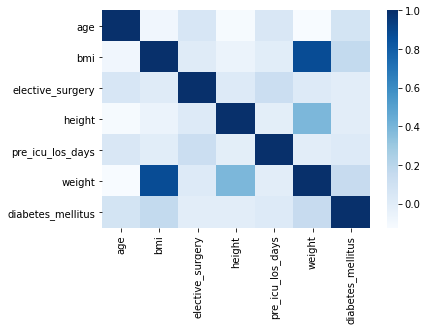

In [196]:
correlationanalysis = demographics_labeled.join(labeled_data['diabetes_mellitus'])
sns.heatmap(correlationanalysis.corr(), cmap='Blues')
plt.show()
display(correlationanalysis.corr().style.background_gradient(cmap='Blues'))

We can conclude immediately that there is a high correlation between bmi (body mass index) and weight (body mass), which is expected since bmi is a measure of body fat based on height and weight. Regarding our target variable, we can draw some conclusions: Only two variables show some correlation (although it's really low), bmi and weight.    

### Data Exploration

**Age, Ethnicity and gender**

*Showl*

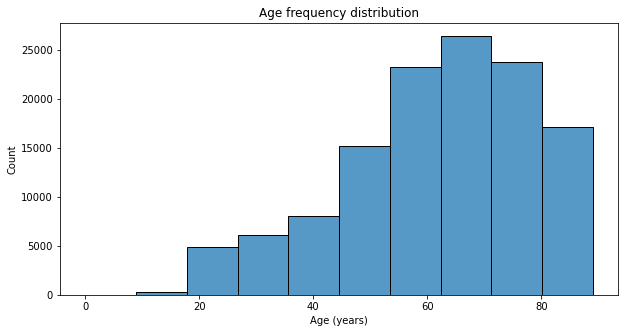

In [197]:
plt.figure(figsize = (10,5))
sns.histplot(demographics_labeled.age, bins = 10)
plt.xlabel("Age (years)")
plt.title("Age frequency distribution")
plt.show()

Most of the patients in the labeled data are between 60 and 80 years old. 
Let's check the age values and see if there are implausible values (under 16):

In [198]:
print("Labeled data:\n\n", demographics_labeled.age[demographics_labeled.age<16].value_counts())
print("\nUnlabeled data:\n\n", demographics_unlabeled.age[demographics_unlabeled.age<16].value_counts())

Labeled data:

 0.0    30
Name: age, dtype: int64

Unlabeled data:

 Series([], Name: age, dtype: int64)


There are 30 points on the labeled data that have an age value of 0, and as we are working with data from people who are 16 or more years old, we will set these points to NAN values

In [199]:
labeled_data.loc[labeled_data.age < 16, "age"] = np.nan
print(labeled_data.age[labeled_data.age<16].value_counts())

Series([], Name: age, dtype: int64)


There are no more implausible values for age. Let's see How the number of cases of diabetes evolve with age:

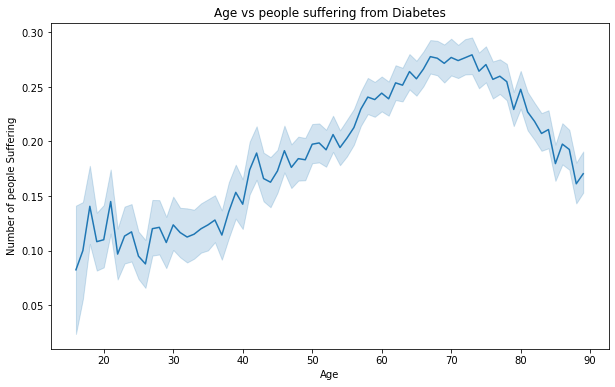

In [200]:
plt.figure(figsize=(10,6))
plt.title("Age vs people suffering from Diabetes")
sns.lineplot(labeled_data["age"],labeled_data["diabetes_mellitus"])
plt.xlabel("Age")
plt.ylabel("Number of people Suffering")
plt.show()

We can conclude that most of the patients that suffer from diabetes mellitus are between 65 and 75. 

In [201]:
byage=labeled_data.groupby(['age']).sum()

In [202]:
byage.loc[byage['diabetes_mellitus']==byage['diabetes_mellitus'].max()]

encounter_id  hospital_id           bmi  elective_surgery     height  \
age                                                                          
67.0     688992680       338218  94390.750911               833  543518.91   

       icu_id  pre_icu_los_days    weight  albumin_apache  apache_2_diagnosis  \
age                                                                             
67.0  2135269       2884.228472  273444.2          3578.1            614921.0   

      ...  h1_pao2fio2ratio_max  h1_pao2fio2ratio_min  aids  cirrhosis  \
age   ...                                                                
67.0  ...           115115.7446         110175.280298     1         53   

      hepatic_failure  immunosuppression  leukemia  lymphoma  \
age                                                            
67.0               44                123        32         8   

      solid_tumor_with_metastasis  diabetes_mellitus  
age                                                   
67.0                          102                897  

[1 rows x 172 columns]

In [203]:
correlationanalysis[['age','diabetes_mellitus']].corr()

age  diabetes_mellitus
age                1.000000           0.081019
diabetes_mellitus  0.081019           1.000000


The number of diabetes cases reches a peek for people that are around 67 years old. For older people, the number of cases decreases again. For this reason, the correlation between these 2 variables is not very prominent. 

We will create bins for age groups that seem to behave similarly:

[0:20[
[20:40
[40:50[
[50:60[
[60:70[
[70:80[
[80:[

In [204]:
def age_bin(age):
    
    if age <20: 
        return 0
    elif age < 40: 
        return 1
    elif age < 50: 
        return 2
    elif age < 60: 
        return 3
    elif age < 70:
        return 4
    elif age < 80:
        return 5
    else: 
        return 6
                                 

In [205]:
labeled_data['age_bin'] = labeled_data['age'].apply(age_bin)

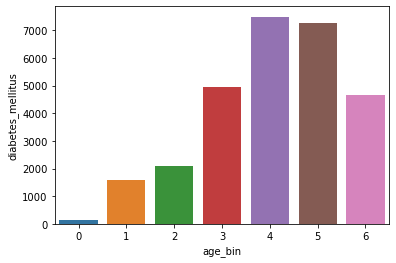

In [206]:
y= (labeled_data.groupby(['age_bin']).sum())['diabetes_mellitus'].reset_index()
sns.barplot(x=y['age_bin'], y= y['diabetes_mellitus'])

Now let's analyse ethnicity and gender distribution:

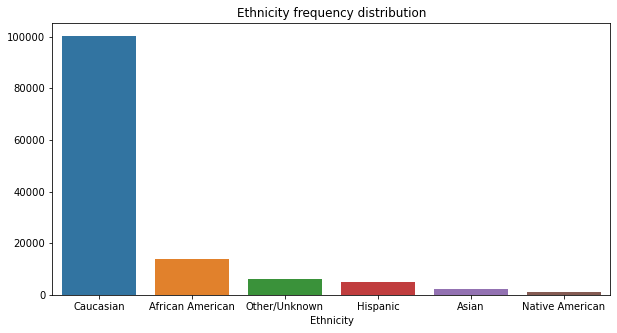

In [207]:
plt.figure(figsize = (10,5))
sns.barplot(x = demographics_labeled.ethnicity.value_counts().keys(), y = demographics_labeled.ethnicity.value_counts().values)
plt.xlabel("Ethnicity")
plt.title("Ethnicity frequency distribution")
plt.show()

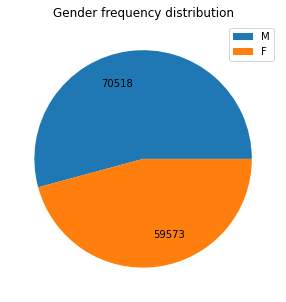

In [208]:
values = demographics_labeled.gender.value_counts().values
labels = demographics_labeled.gender.value_counts().keys()

plt.figure(figsize = (10,5))
plt.pie(x = values, labels = values, labeldistance = 0.7)
plt.legend(labels)
plt.title("Gender frequency distribution")
plt.show()

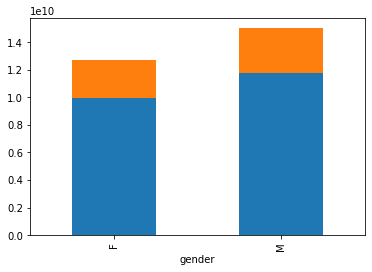

In [209]:
df1=labeled_data.groupby(['gender','diabetes_mellitus'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=False) #blue : no diabetes ; orange: diabetes
plt.show()

Most of the people are Caucasian and regarding gender, the dataset is almost distributed equally, although there are more males than females.

In the previous graph we can conclude that there are more males diagnosed with diabetes mellitus than females, but this can be due to the fact that there are more males in the dataset.

**Height, weight and bmi**

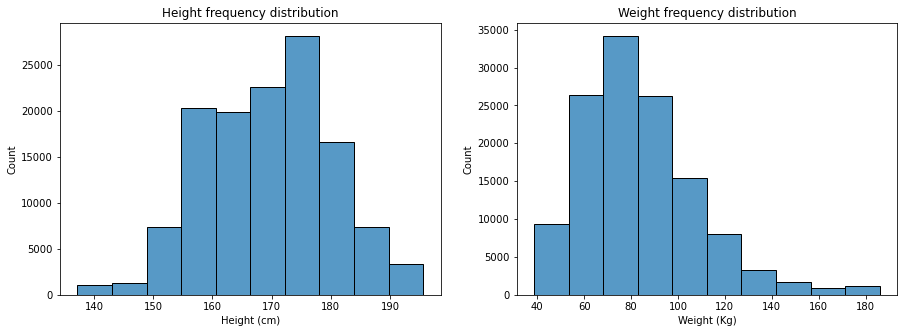

In [210]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.histplot(demographics_labeled.height, bins = 10, ax = axes[0])
axes[0].set_xlabel("Height (cm)")
axes[0].set_title("Height frequency distribution")
sns.histplot(demographics_labeled.weight, bins = 10, ax = axes[1])
axes[1].set_title("Weight frequency distribution")
axes[1].set_xlabel("Weight (Kg)")

plt.show()


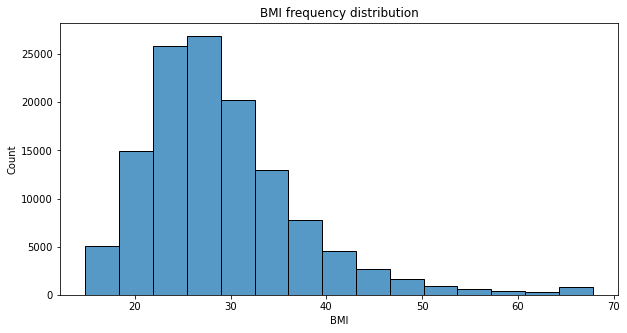

In [211]:
plt.figure(figsize = (10,5))
sns.histplot(demographics_labeled.bmi, bins = 15)
plt.xlabel("BMI")
plt.title("BMI frequency distribution")
plt.show()

In [212]:
correlationanalysis[['bmi','height','weight','diabetes_mellitus']].corr()

bmi    height    weight  diabetes_mellitus
bmi                1.000000 -0.056617  0.878656           0.169043
height            -0.056617  1.000000  0.390319          -0.004302
weight             0.878656  0.390319  1.000000           0.155517
diabetes_mellitus  0.169043 -0.004302  0.155517           1.000000

BMI formula : BMI = kg/m^2
Naturally, when weight increases, so does the BMI, which leads to high correlation between the variables. Therefore, we will focus our analysis on the BMI levels (which will translate into similar behaviour in the weight).

We will separate BMI values into 4 leves, tipically used in medicine.

- Below 18.5	: Underweight
- 18.5 – 24.9	: Normal or Healthy Weight
- 25.0 – 29.9	: Overweight
- 30.0 and Above	: Obese

In [213]:
def bmi_bin(bmi):
    
    if bmi < 18.5: 
        return "underweight"
    elif bmi < 25: 
        return "healthy"
    elif bmi < 30: 
        return "overweight"
    else: 
        return "obese"

In [214]:
def bmi_encoder(bmi):
    
    if bmi < 18.5: 
        return -1
    elif bmi < 25: 
        return 0
    elif bmi < 30: 
        return 1
    else:
        return 2

In [215]:
labeled_data['bmi_class'] = labeled_data['bmi'].apply(bmi_bin)

labeled_data['bmi_class_encoder'] = labeled_data['bmi'].apply(bmi_encoder)

*Showl*

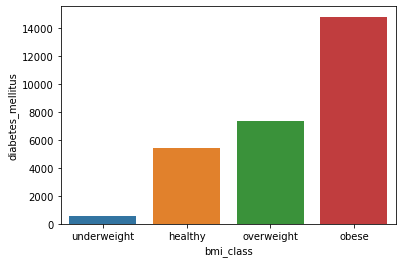

In [216]:
y= (labeled_data.groupby(['bmi_class_encoder','bmi_class']).sum())['diabetes_mellitus'].reset_index()
sns.barplot(x=y['bmi_class'], y=y['diabetes_mellitus'])
plt.show()


In [217]:
def height_bin(height): 
    
    if height < 150: 
        return 0
    elif height < 165: 
        return 1
    elif height < 180: 
        return 2
    else: 
        return 3

In [218]:
labeled_data['height_bin'] = labeled_data['height'].apply(height_bin)

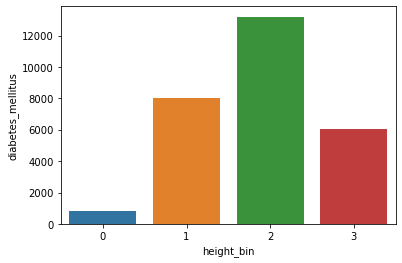

In [219]:
y= (labeled_data.groupby(['height_bin']).sum())['diabetes_mellitus'].reset_index()
sns.barplot(x=y['height_bin'], y=y['diabetes_mellitus'])
plt.show()

In [220]:
labeled_data[['height_bin','age_bin','diabetes_mellitus']].corr()

height_bin   age_bin  diabetes_mellitus
height_bin           1.000000 -0.126394          -0.009026
age_bin             -0.126394  1.000000           0.063548
diabetes_mellitus   -0.009026  0.063548           1.000000

Height does not have a relevant effect on diabetes number of detections, except for the fact that the number of diabetes on people under 150cm is much lower than on other levels. These will probably childen (which proves the point made above, that diabetes is more common among people in their sixties).

##### Combine BMI and age groups


In [221]:
labeled_data['profile'] = labeled_data["bmi_class_encoder"].astype(str) + labeled_data["age_bin"].astype(str)

#-1: underweight
#0: normal
#1: overweight
#2: obese

#0: <20
#1: 20<i<40
#2: 40<i<50
#3: 50<i<40
#4: 60<i<70
#5: 70<i<80
#6: 80<

In [222]:
profilescount = labeled_data['profile'].value_counts().to_frame()
#display(profilescount)

From the people in our dataset, the most common profile seems to be people between 60 / 70 years old, who are obese, followed by people slightly younger but also obese. Weight is a prominent characteristic in the patients.

People older than 80 years old are mainly in the normal BMI levels.

From the younger groups, the ones that are less represented in the dataset, most seem to be in the healthy weight level. There are more obese young people than underweight.


In [223]:
profilescount

profile
24     12900
23     10591
25     10576
06      9723
15      8504
14      8109
16      7447
05      7238
04      6735
13      6304
26      5863
22      5638
03      5489
21      5002
01      4304
11      3381
12      3183
02      2803
-16     1467
-15     1045
-14      983
-13      828
-11      599
00       572
-12      313
20       246
10       226
-10       88

In [224]:
profilescount= profilescount.rename(columns={'profile':'count'})

In [225]:
diabetesbyprofile=labeled_data.groupby(['profile']).sum()['diabetes_mellitus'].to_frame()

In [226]:
profiledf=profilescount.join(diabetesbyprofile)
profiledf['%_diabetes'] = round(profiledf['diabetes_mellitus']/profiledf['count']*100,2)

In [227]:
profiledf.sort_values(by='%_diabetes', ascending=False)

count  diabetes_mellitus  %_diabetes
25   10576               3710       35.08
24   12900               4478       34.71
23   10591               3027       28.58
26    5863               1660       28.31
15    8504               2146       25.24
-10     88                 22       25.00
22    5638               1286       22.81
14    8109               1793       22.11
16    7447               1515       20.34
05    7238               1281       17.70
13    6304               1097       17.40
04    6735               1101       16.35
12    3183                444       13.95
06    9723               1349       13.87
-11    599                 83       13.86
10     226                 31       13.72
03    5489                724       13.19
01    4304                542       12.59
21    5002                613       12.26
02    2803                340       12.13
-14    983                119       12.11
00     572                 68       11.89
-13    828                 93       11.23
-15   1045                116       11.10
11    3381                339       10.03
-12    313                 30        9.58
-16   1467                134        9.13
20     246                 10        4.07

It's possible to see that the highest percentage of diabetes also in older / obese groups.

**Hospital and ICU admit source**

Hospital and ICU admit sources stand for the locations of the patients prior to being admitted to the hospital or the unit, respectively

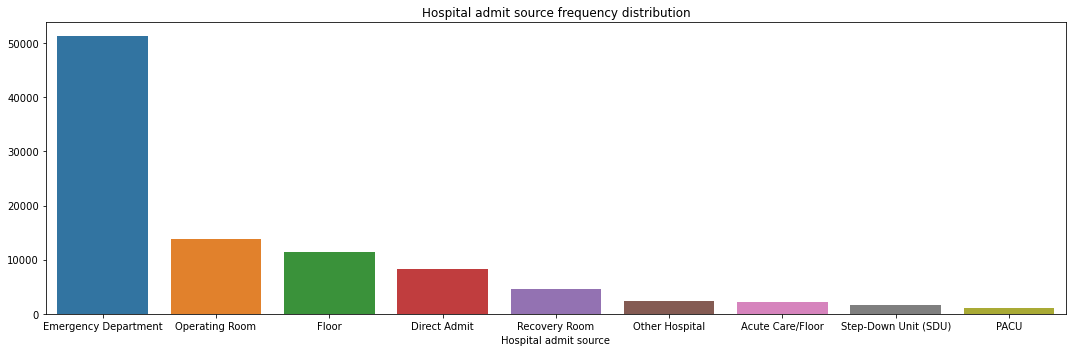

In [228]:
plt.figure(figsize = (15,5))

filtered = demographics_labeled.hospital_admit_source.value_counts()\
[demographics_labeled.hospital_admit_source.value_counts().values > 500]

sns.barplot(x = filtered.keys(),
            y = filtered.values)
plt.xlabel("Hospital admit source")
plt.title("Hospital admit source frequency distribution")

plt.tight_layout()
plt.show()

Nearly all the people were admitted in the emergency department. 

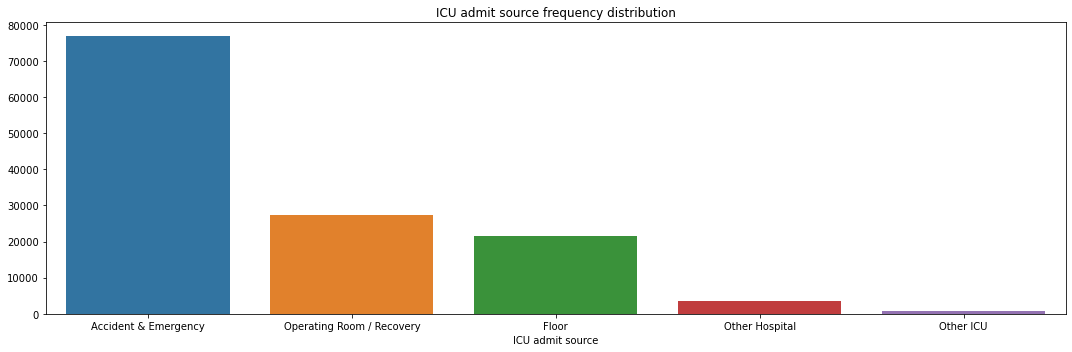

In [229]:
plt.figure(figsize = (15,5))

sns.barplot(x = demographics_labeled.icu_admit_source.value_counts().keys(),
            y = demographics_labeled.icu_admit_source.value_counts().values)
plt.xlabel("ICU admit source")
plt.title("ICU admit source frequency distribution")

plt.tight_layout()
plt.show()

The location of the majority of the patients before being admitted to the unit was "Accident & Emergency".

**ICU type and stay type**

ICU type indicates the type of care the unit is capable of providing. ICU stay type says whether the patient should be admitted, transferred or readmitted on the unit

The two mosT ICU type and stay are respectvaly Med-Surg ICU and admit, as we can conclude throw the following graphs.

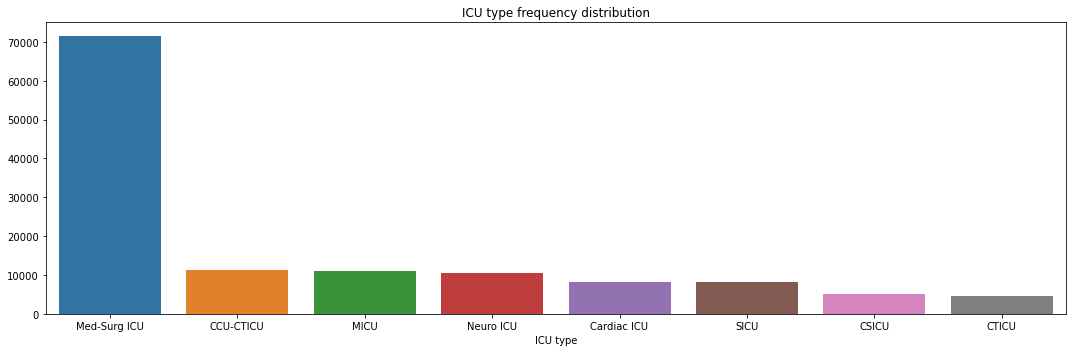

In [230]:
plt.figure(figsize = (15,5))

sns.barplot(x = demographics_labeled.icu_type.value_counts().keys(),
            y = demographics_labeled.icu_type.value_counts().values)
plt.xlabel("ICU type")
plt.title("ICU type frequency distribution")

plt.tight_layout()
plt.show()

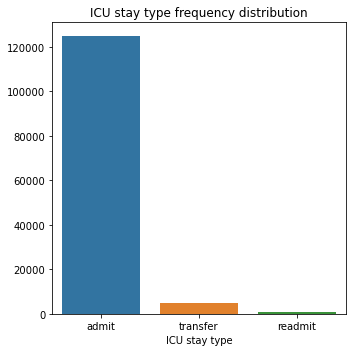

In [231]:
plt.figure(figsize = (5,5))

sns.barplot(x = demographics_labeled.icu_stay_type.value_counts().keys(),
            y = demographics_labeled.icu_stay_type.value_counts().values)
plt.xlabel("ICU stay type")
plt.title("ICU stay type frequency distribution")

plt.tight_layout()
plt.show()

**Elective Surgery**

This variable indicates whether the patient was admitted to the hospital for an elective surgical operation

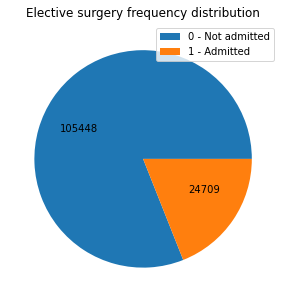

In [232]:
values = demographics_labeled.elective_surgery.value_counts().values
labels = ["0 - Not admitted", "1 - Admitted"]

plt.figure(figsize = (10,5))
plt.pie(x = values, labels = values, labeldistance = 0.5)
plt.legend(labels)
plt.title("Elective surgery frequency distribution")
plt.show()

A high percentage of patients weren't check in the hospital for an elective surgical operation.
Let's check the relationship between the elective surgery admission and the development of diabetes mellitus:

In [233]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

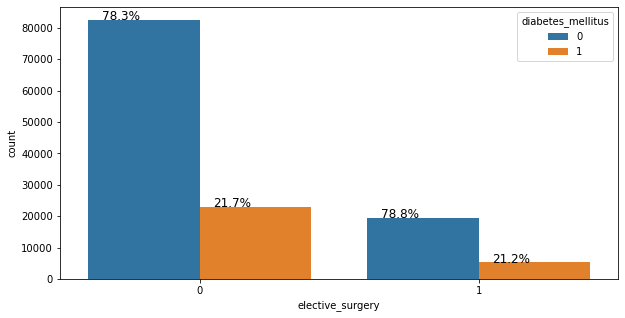

In [234]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = "elective_surgery", hue = "diabetes_mellitus", data = labeled_data)
with_hue(ax, labeled_data.elective_surgery, 2, 2)

In [235]:
labeled_data["elective_surgery"].corr(labeled_data["diabetes_mellitus"])

-0.004909945382195193

By looking at the relative values, and confirmed by the correlation value between the two variables, we can see that there is not a direct correlation / influence between the admission to an elective surgery and the development of diabetes mellitus.

**Pre ICU days**

In [236]:
data_dic.loc[data_dic['Variable Name'] == 'pre_icu_los_days']

Category     Variable Name Unit of Measure Data Type  \
14  demographic  pre_icu_los_days            Days   numeric   

                                                                        Description  \
14  The length of stay of the patient between hospital admission and unit admission   

   Example  
14     3.5

Pre_icu_los_days represents the length of stay of the patient between hospital admission and unit admission

In [237]:
demographics_labeled.pre_icu_los_days.value_counts().sort_values(ascending = False).to_frame()

pre_icu_los_days
0.000000               5364
0.000694               1649
0.001389               1128
0.002083               1016
0.003472                927
...                     ...
10.627083                 1
7.803472                  1
3.809722                  1
8.667361                  1
21.430556                 1

[10912 rows x 1 columns]

In [238]:
labeled_data['pre_icu_los_hours'] = labeled_data['pre_icu_los_days']*24

In [239]:
labeled_data['pre_icu_los_hours'].describe()

count    130157.000000
mean         20.158396
std          59.648082
min          -6.000000
25%           1.100000
50%           3.733333
75%          10.166667
max        4215.066667
Name: pre_icu_los_hours, dtype: float64

In [240]:
def icu_wait(hours):
    if hours < 1:
        return 'under 1 hour'
    elif hours <3:
        return 'under 3 hours'
    elif hours<24:
        return 'under 1 day'
    else:
        return 'over 1 day'
        
def icu_wait_code(hours):
    if hours < 1:
        return -1
    elif hours <3:
        return 0
    elif hours<24:
        return 1
    else:
        return 2
    

In [241]:
labeled_data['pre_icu_bin'] = labeled_data['pre_icu_los_hours'].apply(icu_wait)

labeled_data['pre_icu_encoder']=labeled_data['pre_icu_los_hours'].apply(icu_wait_code)

In [242]:
labeled_data[['pre_icu_bin','pre_icu_encoder']]

pre_icu_bin  pre_icu_encoder
1         under 1 day                1
2         under 1 day                1
3        under 1 hour               -1
4        under 1 hour               -1
5       under 3 hours                0
...               ...              ...
130153   under 1 hour               -1
130154   under 1 hour               -1
130155    under 1 day                1
130156    under 1 day                1
130157  under 3 hours                0

[130157 rows x 2 columns]

In [243]:
labeled_data['pre_icu_bin'].value_counts()

under 1 day      51175
under 1 hour     30836
under 3 hours    26891
over 1 day       21255
Name: pre_icu_bin, dtype: int64

In [244]:
counticubin=labeled_data.pre_icu_bin.value_counts().to_frame()


In [245]:
counticubin=counticubin.reindex(index = ['under 1 hour','under 3 hours', 'under 1 day', 'over 1 day'])
counticubin

pre_icu_bin
under 1 hour         30836
under 3 hours        26891
under 1 day          51175
over 1 day           21255

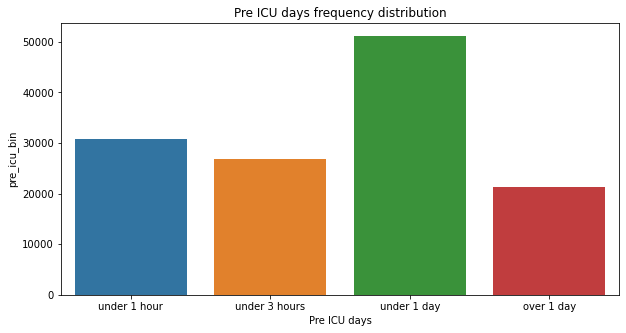

In [246]:
plt.figure(figsize = (10,5))
sns.barplot(x=counticubin.index, y= counticubin['pre_icu_bin'])
plt.xlabel("Pre ICU days")
plt.title("Pre ICU days frequency distribution")
plt.show()

In [247]:
dibetesicdays = labeled_data.groupby(['pre_icu_encoder']).sum()['diabetes_mellitus'].to_frame()

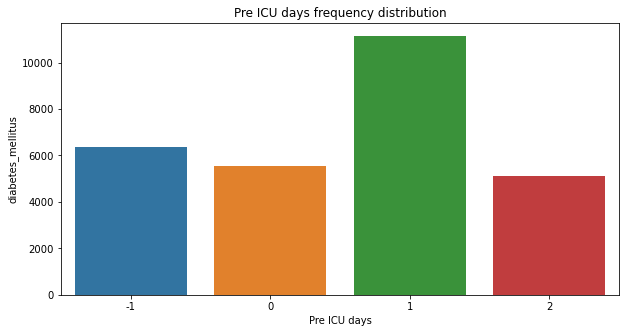

In [248]:
plt.figure(figsize = (10,5))
sns.barplot(x=dibetesicdays.index, y= dibetesicdays['diabetes_mellitus'])
plt.xlabel("Pre ICU days")
plt.title("Pre ICU days frequency distribution")
plt.show()

In [249]:
countencoder=labeled_data.pre_icu_encoder.value_counts().to_frame()

In [250]:
diabetesicu=dibetesicdays.join(countencoder)

In [251]:
diabetesicu['%_diabetes'] = diabetesicu['diabetes_mellitus']/diabetesicu['pre_icu_encoder']

In [252]:
diabetesicu

diabetes_mellitus  pre_icu_encoder  %_diabetes
pre_icu_encoder                                                
-1                            6374            30836    0.206706
 0                            5533            26891    0.205757
 1                           11148            51175    0.217841
 2                            5096            21255    0.239755

In [253]:
labeled_data[['pre_icu_encoder','diabetes_mellitus']].corr()

pre_icu_encoder  diabetes_mellitus
pre_icu_encoder           1.000000           0.024997
diabetes_mellitus         0.024997           1.000000

It's possible to conclude that the patients that stay in the ICU less than a day are the ones with more diagnoses of diabetes mellitus. However, the correlation between the ICU time and diabetes mellitus is really low, which means that both variables behave differently.

## 3. Labs

Now that we checked and understand the demographic variables we are going to analyze the labs variables. 

In [254]:
labs = data_dic.loc[data_dic.Category == "labs"]
display(labs)
labs_vars = labs["Variable Name"].to_list()

Category      Variable Name Unit of Measure Data Type  \
97      labs     d1_albumin_max            None   numeric   
98      labs     d1_albumin_min             g/L   numeric   
99      labs   d1_bilirubin_max      micromol/L   numeric   
100     labs   d1_bilirubin_min      micromol/L   numeric   
101     labs         d1_bun_max          mmol/L   numeric   
102     labs         d1_bun_min          mmol/L   numeric   
103     labs     d1_calcium_max          mmol/L   numeric   
104     labs     d1_calcium_min          mmol/L   numeric   
105     labs  d1_creatinine_max      micromol/L   numeric   
106     labs  d1_creatinine_min      micromol/L   numeric   
107     labs     d1_glucose_max          mmol/L   numeric   
108     labs     d1_glucose_min          mmol/L   numeric   
109     labs        d1_hco3_max          mmol/L   numeric   
110     labs        d1_hco3_min            None   numeric   
111     labs  d1_hemaglobin_max            g/dL   numeric   
112     labs  d1_hemaglobin_min            g/dL   numeric   
113     labs  d1_hematocrit_max        Fraction   numeric   
114     labs  d1_hematocrit_min        Fraction   numeric   
115     labs         d1_inr_max      micromol/L   numeric   
116     labs         d1_inr_min      micromol/L   numeric   
117     labs     d1_lactate_max          mmol/L   numeric   
118     labs     d1_lactate_min          mmol/L   numeric   
119     labs   d1_platelets_max          10^9/L   numeric   
120     labs   d1_platelets_min          10^9/L   numeric   
121     labs   d1_potassium_max          mmol/L   numeric   
122     labs   d1_potassium_min          mmol/L   numeric   
123     labs      d1_sodium_max          mmol/L   numeric   
124     labs      d1_sodium_min          mmol/L   numeric   
125     labs         d1_wbc_max          10^9/L   numeric   
126     labs         d1_wbc_min          10^9/L   numeric   
127     labs     h1_albumin_max            None   numeric   
128     labs     h1_albumin_min             g/L   numeric   
129     labs   h1_bilirubin_max      micromol/L   numeric   
130     labs   h1_bilirubin_min      micromol/L   numeric   
131     labs         h1_bun_max          mmol/L   numeric   
132     labs         h1_bun_min          mmol/L   numeric   
133     labs     h1_calcium_max          mmol/L   numeric   
134     labs     h1_calcium_min          mmol/L   numeric   
135     labs  h1_creatinine_max      micromol/L   numeric   
136     labs  h1_creatinine_min      micromol/L   numeric   
137     labs     h1_glucose_max          mmol/L   numeric   
138     labs     h1_glucose_min          mmol/L   numeric   
139     labs        h1_hco3_max          mmol/L   numeric   
140     labs        h1_hco3_min            None   numeric   
141     labs  h1_hemaglobin_max            g/dL   numeric   
142     labs  h1_hemaglobin_min            g/dL   numeric   
143     labs  h1_hematocrit_max        Fraction   numeric   
144     labs  h1_hematocrit_min        Fraction   numeric   
145     labs         h1_inr_max      micromol/L   numeric   
146     labs         h1_inr_min      micromol/L   numeric   
147     labs     h1_lactate_max          mmol/L   numeric   
148     labs     h1_lactate_min          mmol/L   numeric   
149     labs   h1_platelets_max          10^9/L   numeric   
150     labs   h1_platelets_min          10^9/L   numeric   
151     labs   h1_potassium_max          mmol/L   numeric   
152     labs   h1_potassium_min          mmol/L   numeric   
153     labs      h1_sodium_max          mmol/L   numeric   
154     labs      h1_sodium_min          mmol/L   numeric   
155     labs         h1_wbc_max          10^9/L   numeric   
156     labs         h1_wbc_min          10^9/L   numeric   

                                                                                                                                     Description  \
97                                   The lowest albumin concentration of the patient in their serum during the first 24 hours of their

In [255]:
labs_labeled = labeled_data[labs_vars]
labs_unlabeled = unlabeled_data[labs_vars]

There are 59 labs variables. 

### 3.1 Data Quality verification

**3.1.1 Missing Values Checking**

In [256]:
a = (labs_labeled.isnull().sum() / len(labs_labeled) * 100)
b = (labs_unlabeled.isnull().sum() / len(labs_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% labeled data null values", ascending = False)

display(null_values)

% labeled data null values  % unlabeled data null values
h1_bilirubin_min                    92.089553                     91.919093
h1_bilirubin_max                    92.089553                     91.919093
h1_albumin_max                      91.431886                     91.508697
h1_albumin_min                      91.431886                     91.508697
h1_lactate_min                      91.018539                     92.055892
h1_lactate_max                      91.018539                     92.055892
h1_hco3_min                         81.743587                     81.473520
h1_hco3_max                         81.743587                     81.473520
h1_wbc_max                          81.429351                     80.750440
h1_wbc_min                          81.429351                     80.750440
h1_calcium_min                      81.379411                     81.160836
h1_calcium_max                      81.379411                     81.160836
h1_platelets_min                    81.231897                     80.085988
h1_platelets_max                    81.231897                     80.085988
h1_bun_max                          80.664121                     80.418214
h1_bun_min                          80.664121                     80.418214
h1_creatinine_max                   80.505851                     80.320500
h1_creatinine_min                   80.505851                     80.320500
h1_hematocrit_min                   79.101393                     78.551886
h1_hematocrit_max                   79.101393                     78.551886
h1_hemaglobin_max                   78.973855                     78.610514
h1_hemaglobin_min                   78.973855                     78.610514
h1_sodium_max                       78.198637                     77.828806
h1_sodium_min                       78.198637                     77.828806
h1_potassium_min                    77.461066                     76.988470
h1_potassium_max                    77.461066                     76.988470
d1_lactate_min                      73.375231                     76.109048
d1_lactate_max                      73.375231                     76.109048
h1_inr_max                          62.396183                     58.979871
h1_inr_min                          62.396183                     58.979871
d1_inr_min                          62.396183                     58.979871
d1_inr_max                          62.396183                     58.979871
d1_bilirubin_max                    58.955723                     57.260113
d1_bilirubin_min                    58.955723                     57.260113
h1_glucose_min                      57.678803                     58.530389
h1_glucose_max                      57.678803                     58.530389
d1_albumin_max                      54.861437                     54.133281
d1_albumin_min                      54.861437                     54.133281
d1_hco3_min                         15.402168                     15.575533
d1_hco3_max                         15.402168                     15.575533
d1_platelets_max                    14.257397                     13.650577
d1_platelets_min                    14.257397                     13.650577
d1_wbc_min                          13.390751                     13.894860
d1_wbc_max                          13.390751                     13.894860
d1_calcium_max                      12.824512                     13.699433
d1_calcium_min                      12.824512                     13.699433
d1_hemaglobin_max                   12.471093                     12.204417
d1_hemaglobin_min                   12.471093                     12.204417
d1_hematocrit_max                   11.976306                     12.008990
d1_hematocrit_min                   11.976306                     12.008990
d1_bun_min                          10.551872                     10.826656
d1_bun_max                          10.551872                     1

There are many variables with a lot of missing values on the Labs variables. These variables can be really important to determine our target variable. In the next step of our project, we define a threshold and a strategy to deal with all of these missing values. 

**3.1.2 Removing unnecessary columns**

In this case, it is not necessary to remove any column from the Labs variables set

### 3.2 Labs data description

In [257]:
labs_labeled

d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  \
1                  2.3             2.3               0.4               0.4   
2                  1.6             1.6               0.5               0.5   
3                  NaN             NaN               NaN               NaN   
4                  NaN             NaN               NaN               NaN   
5                  NaN             NaN               NaN               NaN   
...                ...             ...               ...               ...   
130153             NaN             NaN               NaN               NaN   
130154             3.5             3.5               0.7               0.7   
130155             3.3             3.3               0.5               0.5   
130156             NaN             NaN               NaN               NaN   
130157             NaN             NaN               NaN               NaN   

        d1_bun_max  d1_bun_min  d1_calcium_max  d1_calcium_min  \
1             31.0        30.0             8.5             7.4   
2             11.0         9.0             8.6             8.0   
3              NaN         NaN             NaN             NaN   
4              NaN         NaN             NaN             NaN   
5              NaN         NaN             NaN             NaN   
...            ...         ...             ...             ...   
130153         NaN         NaN             NaN             NaN   
130154        32.0        32.0             9.0             9.0   
130155        31.0        30.0             8.1             8.0   
130156        45.0        45.0             6.4             6.4   
130157        13.0        13.0             9.5             9.5   

        d1_creatinine_max  d1_creatinine_min  ...  h1_lactate_max  \
1                    2.51               2.23  ...             NaN   
2                    0.71               0.56  ...             3.5   
3                     NaN                NaN  ...             NaN   
4                     NaN                NaN  ...             NaN   
5                     NaN                NaN  ...             NaN   
...                   ...                ...  ...             ...   
130153                NaN                NaN  ...             NaN   
130154               1.07               1.07  ...             NaN   
130155               2.65               2.41  ...             9.8   
130156               2.21               2.21  ...             1.3   
130157               1.06               1.06  ...             NaN   

        h1_lactate_min  h1_platelets_max  h1_platelets_min  h1_potassium_max  \
1                  NaN               NaN               NaN               NaN   
2                  3.5             557.0             557.0               4.2   
3                  NaN               NaN               NaN               NaN   
4                  NaN              43.0              43.0               NaN   
5                  NaN               NaN               NaN               NaN   
...                ...               ...               ...               ...   
130153             NaN               NaN               NaN               NaN   
130154             NaN               NaN               NaN               NaN   
130155             9.8             232.0             232.0               3.9   
130156             1.3               NaN               NaN               NaN   
130157             NaN               NaN               NaN               4.1   

        h1_potassium_min  h1_sodium_max  h1_sodium_min  h1_wbc_max  h1_wbc_min  
1                    NaN            NaN            NaN         NaN         NaN  
2                    4.2          145.0          145.0        12.7        12.7  
3                    NaN            NaN            NaN         NaN         NaN  
4                    NaN            NaN            NaN         8.8         8.8  
5                    NaN            NaN            NaN         NaN         NaN  
..

In [258]:
labs_labeled.describe()

d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  \
count    58751.000000    58751.000000      53422.000000      53422.000000   
mean         2.952673        2.883073          1.191379          1.117405   
std          0.675606        0.679808          2.319165          2.201525   
min          1.200000        1.100000          0.200000          0.200000   
25%          2.500000        2.400000          0.400000          0.400000   
50%          3.000000        2.900000          0.700000          0.600000   
75%          3.400000        3.400000          1.100000          1.000000   
max          4.600000        4.500000         60.200000         58.000000   

          d1_bun_max     d1_bun_min  d1_calcium_max  d1_calcium_min  \
count  116423.000000  116423.000000   113465.000000   113465.000000   
mean       25.578808      23.554154        8.379782        8.164674   
std        20.495927      18.708332        0.740098        0.793055   
min         4.000000       3.000000        6.200000        5.500000   
25%        13.000000      12.000000        7.900000        7.700000   
50%        19.000000      17.000000        8.400000        8.200000   
75%        31.000000      29.000000        8.800000        8.700000   
max       126.000000     113.090000       10.800000       10.300000   

       d1_creatinine_max  d1_creatinine_min  ...  h1_lactate_max  \
count      116884.000000      116884.000000  ...    11690.000000   
mean            1.493531           1.363795  ...        3.028198   
std             1.525906           1.341642  ...        2.898524   
min             0.340000           0.300000  ...        0.400000   
25%             0.750000           0.710000  ...        1.300000   
50%             1.000000           0.940000  ...        2.000000   
75%             1.510000           1.400000  ...        3.600000   
max            11.110000           9.937900  ...       18.100000   

       h1_lactate_min  h1_platelets_max  h1_platelets_min  h1_potassium_max  \
count    11690.000000      24428.000000      24428.000000      29336.000000   
mean         2.976982        193.943057        193.123506          4.188984   
std          2.854953         92.486473         92.692759          0.760183   
min          0.400000         20.000000         20.000000          2.500000   
25%          1.250000        131.000000        130.000000          3.700000   
50%          2.000000        179.000000        179.000000          4.100000   
75%          3.500000        239.000000        238.000000          4.500000   
max         18.019500        585.000000        585.000000          7.200000   

       h1_potassium_min  h1_sodium_max  h1_sodium_min    h1_wbc_max  \
count      29336.000000   28376.000000   28376.000000  24171.000000   
mean           4.147028     138.167205     137.879814     13.387873   
std            0.749463       5.711628       5.658036      6.933161   
min            2.500000     114.000000     114.000000      1.100000   
25%            3.700000     136.000000     135.000000      8.600000   
50%            4.100000     139.000000     138.000000     12.100000   
75%            4.500000     141.000000     141.000000     16.700000   
max            7.100000     157.000000     157.000000     44.102000   

         h1_wbc_min  
count  24171.000000  
mean      13.336485  
std        6.915142  
min        1.089800  
25%        8.500000  
50%       12.100000  
75%       16.600000  
max       44.102000  

[8 rows x 60 columns]

This description is just a brief understanding of some of the main statistics of those variables.

### 3.3 Correlation

In the following heatmap, we can see there are some variables that are highly correlated, mainly in the diagonals, which correspond to the "first 24 hours" and "first hour" values for the same lab's sign, this indicates that the first hour usually corresponds to the average value of the same day.

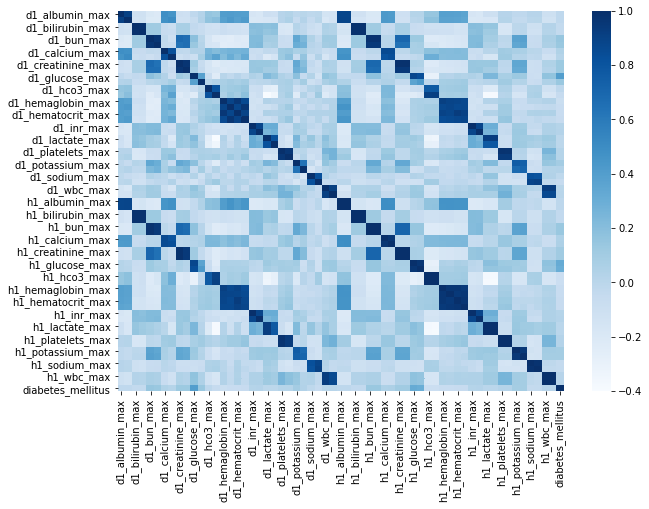

In [259]:
labs_diabetes = labs_labeled.join(labeled_data['diabetes_mellitus'])
plt.figure(figsize = (10, 7))
sns.heatmap(labs_diabetes.corr(), cmap = 'Blues')
plt.show()
display(labs_diabetes.corr().style.background_gradient(cmap='Blues'))

## 4. Labs blood gas

The next category is the lab blood gas, these variables are mostly information about the blood levels of the patients

In [260]:
labs_blood = data_dic.loc[data_dic.Category == "labs blood gas"]
display(labs_blood)
labs_blood_vars = labs_blood["Variable Name"].to_list()

Category         Variable Name         Unit of Measure Data Type  \
157  labs blood gas  d1_arterial_pco2_max  Millimetres of mercury   numeric   
158  labs blood gas  d1_arterial_pco2_min  Millimetres of mercury   numeric   
159  labs blood gas    d1_arterial_ph_max                    None   numeric   
160  labs blood gas    d1_arterial_ph_min                    None   numeric   
161  labs blood gas   d1_arterial_po2_max  Millimetres of mercury   numeric   
162  labs blood gas   d1_arterial_po2_min  Millimetres of mercury   numeric   
163  labs blood gas  d1_pao2fio2ratio_max                Fraction   numeric   
164  labs blood gas  d1_pao2fio2ratio_min                Fraction   numeric   
165  labs blood gas  h1_arterial_pco2_max  Millimetres of mercury   numeric   
166  labs blood gas  h1_arterial_pco2_min  Millimetres of mercury   numeric   
167  labs blood gas    h1_arterial_ph_max                    None   numeric   
168  labs blood gas    h1_arterial_ph_min                    None   numeric   
169  labs blood gas   h1_arterial_po2_max  Millimetres of mercury   numeric   
170  labs blood gas   h1_arterial_po2_min  Millimetres of mercury   numeric   
171  labs blood gas  h1_pao2fio2ratio_max                Fraction   numeric   
172  labs blood gas  h1_pao2fio2ratio_min                Fraction   numeric   

                                                                                                              Description  \
157  The highest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay   
158   The lowest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay   
159                                  The highest arterial pH for the patient during the first 24 hours of their unit stay   
160                                   The lowest arterial pH for the patient during the first 24 hours of their unit stay   
161          The highest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay   
162           The lowest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay   
163                  The highest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay   
164                   The lowest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay   
165      The highest arterial partial pressure of carbon dioxide for the patient during the first hour of their unit stay   
166       The lowest arterial partial pressure of carbon dioxide for the patient during the first hour of their unit stay   
167                                      The highest arterial pH for the patient during the first hour of their unit stay   
168                                       The lowest arterial pH for the patient during the first hour of their unit stay   
169              The highest arterial partial pressure of oxygen for the patient during the first hour of their unit stay   
170               The lowest arterial partial pressure of oxygen for the patient during the first hour of their unit stay   
171                      The highest fraction of inspired oxygen for the patient during the first hour of their unit stay   
172                       The lowest fraction of inspired oxygen for the patient during the first hour of their unit stay   

    Example  
157      40  
158      40  
159     7.4  
160     7.4  
161      80  
162      80  
163    0.21  
164    0.21  
165      40  
166      40  
167     7.4  
168     7.4  
169      80  
170      80  
171    0.21  
172    0.21

In [261]:
labs_blood_labeled = labeled_data[labs_blood_vars]
labs_blood_unlabeled = unlabeled_data[labs_blood_vars]

We have 15 labs blood variables.

### 4.1 Data Quality verification

**4.1.1 Missing Values Checking**

In [262]:
a = (labs_blood_labeled.isnull().sum() / len(labs_blood_labeled) * 100)
b = (labs_blood_unlabeled.isnull().sum() / len(labs_blood_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% labeled data null values", ascending = False)

display(null_values)

% labeled data null values  % unlabeled data null values
h1_pao2fio2ratio_max                   87.123243                     86.105140
h1_pao2fio2ratio_min                   87.123243                     86.105140
h1_arterial_ph_max                     82.860699                     82.089115
h1_arterial_ph_min                     82.860699                     82.089115
h1_arterial_pco2_max                   82.720100                     81.561462
h1_arterial_pco2_min                   82.720100                     81.561462
h1_arterial_po2_max                    82.550305                     81.160836
h1_arterial_po2_min                    82.550305                     81.160836
d1_pao2fio2ratio_max                   71.712624                     69.493844
d1_pao2fio2ratio_min                   71.712624                     69.493844
d1_arterial_ph_max                     65.157464                     63.367207
d1_arterial_ph_min                     65.157464                     63.367207
d1_arterial_pco2_max                   64.891631                     62.644127
d1_arterial_pco2_min                   64.891631                     62.644127
d1_arterial_po2_max                    64.545126                     61.969904
d1_arterial_po2_min                    64.545126                     61.969904

There are many variables with a lot of missing values on the Lab blood gas variables. These variables can be really important to determine our target variable. In the next step of our project, we define a threshold and a strategy to deal with all of these missing values.

**4.1.2 Removing unnecessary columns**

In this case, it is not necessary to remove any column from the APACHE comorbidity variables set

### 4.2. Labs blood gas data description

In [263]:
labs_blood_labeled

d1_arterial_pco2_max  d1_arterial_pco2_min  d1_arterial_ph_max  \
1                        NaN                   NaN                 NaN   
2                       37.0                  37.0               7.450   
3                        NaN                   NaN                 NaN   
4                       37.0                  27.0               7.440   
5                        NaN                   NaN                 NaN   
...                      ...                   ...                 ...   
130153                   NaN                   NaN                 NaN   
130154                   NaN                   NaN                 NaN   
130155                  44.0                  23.2               7.614   
130156                   NaN                   NaN                 NaN   
130157                   NaN                   NaN                 NaN   

        d1_arterial_ph_min  d1_arterial_po2_max  d1_arterial_po2_min  \
1                      NaN                  NaN                  NaN   
2                    7.450                 51.0                 51.0   
3                      NaN                  NaN                  NaN   
4                    7.340                337.0                102.0   
5                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
130153                 NaN                  NaN                  NaN   
130154                 NaN                  NaN                  NaN   
130155               7.161                163.0                 80.0   
130156                 NaN                  NaN                  NaN   
130157                 NaN                  NaN                  NaN   

        d1_pao2fio2ratio_max  d1_pao2fio2ratio_min  h1_arterial_pco2_max  \
1                        NaN                   NaN                   NaN   
2                       54.8             51.000000                  37.0   
3                        NaN                   NaN                   NaN   
4                      342.5            236.666667                  36.0   
5                        NaN                   NaN                   NaN   
...                      ...                   ...                   ...   
130153                   NaN                   NaN                   NaN   
130154                   NaN                   NaN                   NaN   
130155                 163.0             80.000000                  36.9   
130156                   NaN                   NaN                   NaN   
130157                   NaN                   NaN                   NaN   

        h1_arterial_pco2_min  h1_arterial_ph_max  h1_arterial_ph_min  \
1                        NaN                 NaN                 NaN   
2                       37.0               7.450               7.450   
3                        NaN                 NaN                 NaN   
4                       33.0               7.370               7.340   
5                        NaN                 NaN                 NaN   
...                      ...                 ...                 ...   
130153                   NaN                 NaN                 NaN   
130154                   NaN                 NaN                 NaN   
130155                  36.9               7.231               7.231   
130156                   NaN                 NaN                 NaN   
130157                   NaN                 NaN                 NaN   

        h1_arterial_po2_max  h1_arterial_po2_min  h1_pao2fio2ratio_max  \
1                       NaN                  NaN                   NaN   
2                      51.0                 51.0                  51.0   
3                       NaN                  NaN                   NaN   
4                     337.0                265.0                 337.0   
5                       NaN                  NaN                   NaN   
...                     ...     

In [264]:
labs_blood_labeled.describe()

d1_arterial_pco2_max  d1_arterial_pco2_min  d1_arterial_ph_max  \
count          45696.000000          45696.000000        45350.000000   
mean              45.341451             38.535587            7.387687   
std               14.623775             10.996254            0.085651   
min               18.400000             14.900000            7.054280   
25%               36.200000             32.000000            7.340000   
50%               42.900000             37.000000            7.390000   
75%               50.000000             43.000000            7.440000   
max              111.000000             85.912000            7.620000   

       d1_arterial_ph_min  d1_arterial_po2_max  d1_arterial_po2_min  \
count        45350.000000         46147.000000         46147.000000   
mean             7.322903           165.003814           102.957476   
std              0.111530           107.084058            61.514357   
min              6.890000            39.000000            28.000000   
25%              7.270000            88.000000            68.000000   
50%              7.340000           127.000000            85.000000   
75%              7.398000           206.000000           116.250000   
max              7.557860           540.865000           448.892000   

       d1_pao2fio2ratio_max  d1_pao2fio2ratio_min  h1_arterial_pco2_max  \
count          36818.000000          36818.000000          22491.000000   
mean             287.600071            224.005403             44.552966   
std              130.319620            119.119675             14.631359   
min               54.800000             36.000000             15.000000   
25%              192.205556            132.000000             36.000000   
50%              275.000000            205.000000             42.000000   
75%              370.000000            300.000000             49.000000   
max              834.805000            604.227778            111.505000   

       h1_arterial_pco2_min  h1_arterial_ph_max  h1_arterial_ph_min  \
count          22491.000000        22308.000000        22308.000000   
mean              43.341081            7.337283            7.327771   
std               14.052015            0.105930            0.108658   
min               14.997000            6.930000            6.900000   
25%               35.000000            7.290000            7.280000   
50%               41.000000            7.350000            7.340000   
75%               48.000000            7.408000            7.400000   
max              107.000000            7.570000            7.563000   

       h1_arterial_po2_max  h1_arterial_po2_min  h1_pao2fio2ratio_max  \
count         22712.000000         22712.000000          16760.000000   
mean            163.035835           145.949537            247.525419   
std             112.646743           100.211935            131.440167   
min              34.000000            31.000000             42.000000   
25%              80.000000            77.000000            144.000000   
50%             119.900000           108.000000            228.125000   
75%             214.000000           182.000000            333.000000   
max             534.905000           514.905000            720.000000   

       h1_pao2fio2ratio_min  
count          16760.000000  
mean             239.617358  
std              128.562211  
min               38.000000  
25%              138.000000  
50%              218.750000  
75%              324.000000  
max              654.813793

This description is just a brief understanding of some of the main statistics of those variables.

### 4.3 Correlation

Like the previous category we can see there are some variables that are highly correlated, mainly in the diagonals, which correspond to the "first 24 hours" and "first hour" values for the same lab's sign, this indicates that the first hour usually corresponds to the average value of the same day. We can use this information after to fill missing values.

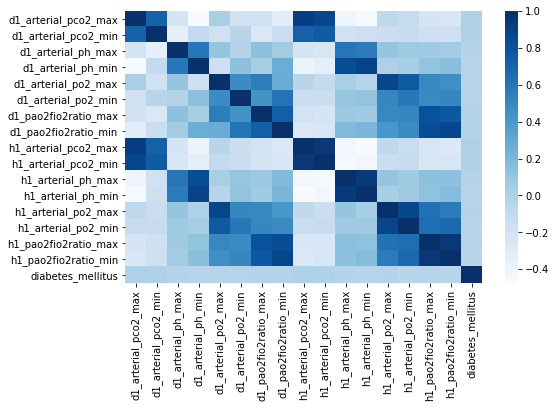

In [265]:
labsblood_diabetes = labs_blood_labeled.join(labeled_data['diabetes_mellitus'])
plt.figure(figsize = (8, 5))
sns.heatmap(labsblood_diabetes.corr(), cmap = 'Blues')
plt.show()
display(labsblood_diabetes.corr().style.background_gradient(cmap='Blues'))

## 5. Vitals

Next, we have the vitals. These variables are the most important since they can give us valuable information regarding patient's health at that moment. 

In [266]:
vitals = data_dic.loc[data_dic.Category == "vitals"]
display(vitals)
vitals_vars = vitals["Variable Name"].to_list()

Category              Variable Name         Unit of Measure Data Type  \
45   vitals     d1_diasbp_invasive_max  Millimetres of mercury   numeric   
46   vitals     d1_diasbp_invasive_min  Millimetres of mercury   numeric   
47   vitals              d1_diasbp_max  Millimetres of mercury   numeric   
48   vitals              d1_diasbp_min  Millimetres of mercury   numeric   
49   vitals  d1_diasbp_noninvasive_max  Millimetres of mercury   numeric   
50   vitals  d1_diasbp_noninvasive_min  Millimetres of mercury   numeric   
51   vitals           d1_heartrate_max        Beats per minute   numeric   
52   vitals           d1_heartrate_min        Beats per minute   numeric   
53   vitals        d1_mbp_invasive_max  Millimetres of mercury   numeric   
54   vitals        d1_mbp_invasive_min  Millimetres of mercury   numeric   
55   vitals                 d1_mbp_max  Millimetres of mercury   numeric   
56   vitals                 d1_mbp_min  Millimetres of mercury   numeric   
57   vitals     d1_mbp_noninvasive_max  Millimetres of mercury   numeric   
58   vitals     d1_mbp_noninvasive_min  Millimetres of mercury   numeric   
59   vitals            d1_resprate_max      Breaths per minute   numeric   
60   vitals            d1_resprate_min      Breaths per minute   numeric   
61   vitals                d1_spo2_max              Percentage   numeric   
62   vitals                d1_spo2_min              Percentage   numeric   
63   vitals      d1_sysbp_invasive_max  Millimetres of mercury   numeric   
64   vitals      d1_sysbp_invasive_min  Millimetres of mercury   numeric   
65   vitals               d1_sysbp_max  Millimetres of mercury   numeric   
66   vitals               d1_sysbp_min  Millimetres of mercury   numeric   
67   vitals   d1_sysbp_noninvasive_max  Millimetres of mercury   numeric   
68   vitals   d1_sysbp_noninvasive_min  Millimetres of mercury   numeric   
69   vitals                d1_temp_max         Degrees Celsius   numeric   
70   vitals                d1_temp_min         Degrees Celsius   numeric   
71   vitals     h1_diasbp_invasive_max  Millimetres of mercury   numeric   
72   vitals     h1_diasbp_invasive_min  Millimetres of mercury   numeric   
73   vitals              h1_diasbp_max  Millimetres of mercury   numeric   
74   vitals              h1_diasbp_min  Millimetres of mercury   numeric   
75   vitals  h1_diasbp_noninvasive_max  Millimetres of mercury   numeric   
76   vitals  h1_diasbp_noninvasive_min  Millimetres of mercury   numeric   
77   vitals           h1_heartrate_max        Beats per minute   numeric   
78   vitals           h1_heartrate_min        Beats per minute   numeric   
79   vitals        h1_mbp_invasive_max  Millimetres of mercury   numeric   
80   vitals        h1_mbp_invasive_min  Millimetres of mercury   numeric   
81   vitals                 h1_mbp_max  Millimetres of mercury   numeric   
82   vitals                 h1_mbp_min  Millimetres of mercury   numeric   
83   vitals     h1_mbp_noninvasive_max  Millimetres of mercury   numeric   
84   vitals     h1_mbp_noninvasive_min  Millimetres of mercury   numeric   
85   vitals            h1_resprate_max      Breaths per minute   numeric   
86   vitals            h1_resprate_min      Breaths per minute   numeric   
87   vitals                h1_spo2_max              Percentage   numeric   
88   vitals                h1_spo2_min              Percentage   numeric   
89   vitals      h1_sysbp_invasive_max  Millimetres of mercury   numeric   
90   vitals      h1_sysbp_invasive_min  Millimetres of mercury   numeric   
91   vitals               h1_sysbp_max  Millimetres of mercury   numeric   
92   vitals               h1_sysbp_min  Millimetres of mercury   numeric   
93   vitals   h1_sysbp_noninvasive_max  Millimetres of mercury   numeric   
94   vitals   h1_sysbp_noninvasive_min  Millimetres of mercury   numeric   
95   vitals                h1_temp_max         Degrees Celsius   numeric   
96   vitals                h1_temp_min         Degr

In [267]:
vitals_labeled = labeled_data[vitals_vars]
vitals_unlabeled = unlabeled_data[vitals_vars]

There are 51 vitals variables.

### 5.1 Data Quality verification

**5.1.1 Missing Values Checking**

In [268]:
a = (vitals_labeled.isnull().sum() / len(vitals_labeled) * 100)
b = (vitals_unlabeled.isnull().sum() / len(vitals_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% labeled data null values", ascending = False)

display(null_values)

% labeled data null values  \
h1_diasbp_invasive_max                      80.540424   
h1_diasbp_invasive_min                      80.540424   
h1_sysbp_invasive_min                       80.523522   
h1_sysbp_invasive_max                       80.523522   
h1_mbp_invasive_min                         80.492021   
h1_mbp_invasive_max                         80.492021   
d1_diasbp_invasive_min                      73.041020   
d1_diasbp_invasive_max                      73.041020   
d1_sysbp_invasive_max                       73.017971   
d1_sysbp_invasive_min                       73.017971   
d1_mbp_invasive_max                         72.887359   
d1_mbp_invasive_min                         72.887359   
h1_temp_max                                 22.820901   
h1_temp_min                                 22.820901   
h1_mbp_noninvasive_min                      10.216124   
h1_mbp_noninvasive_max                      10.216124   
h1_diasbp_noninvasive_max                    8.711787   
h1_diasbp_noninvasive_min                    8.711787   
h1_sysbp_noninvasive_max                     8.704872   
h1_sysbp_noninvasive_min                     8.704872   
h1_mbp_max                                   5.017018   
h1_mbp_min                                   5.017018   
h1_resprate_min                              4.958627   
h1_resprate_max                              4.958627   
h1_spo2_min                                  4.795747   
h1_spo2_max                                  4.795747   
h1_diasbp_max                                4.246410   
h1_diasbp_min                                4.246410   
h1_sysbp_min                                 4.240264   
h1_sysbp_max                                 4.240264   
d1_temp_max                                  3.452753   
d1_temp_min                                  3.452753   
h1_heartrate_min                             3.130066   
h1_heartrate_max                             3.130066   
d1_mbp_noninvasive_min                       1.711779   
d1_mbp_noninvasive_max                       1.711779   
d1_diasbp_noninvasive_max                    1.256944   
d1_diasbp_noninvasive_min                    1.256944   
d1_sysbp_noninvasive_max                     1.246956   
d1_sysbp_noninvasive_min                     1.246956   
d1_resprate_min                              0.524751   
d1_resprate_max                              0.524751   
d1_spo2_min                                  0.408737   
d1_spo2_max                                  0.408737   
d1_mbp_min                                   0.251235   
d1_mbp_max                                   0.251235   
d1_diasbp_min                                0.212820   
d1_diasbp_max                                0.212820   
d1_sysbp_max                                 0.208210   
d1_sysbp_min                                 0.208210   
d1_heartrate_min                             0.201295   
d1_heartrate_max                             0.201295   

                           % unlabeled data null values  
h1_diasbp_invasive_max                        79.861247  
h1_diasbp_invasive_min                        79.861247  
h1_sysbp_invasive_min                         79.831933  
h1_sysbp_invasive_max                         79.831933  
h1_mbp_invasive_min                           79.988274  
h1_mbp_invasive_max                           79.988274  
d1_diasbp_invasive_min                        71.575142  
d1_diasbp_invasive_max                        71.575142  
d1_sysbp_invasive_max                         71.545828  
d1_sysbp_invasive_min                         71.545828  
d1_mbp_invasive_max                           71.477428  
d1_mbp_invasive_min                           71.477428  
h1_temp_max                                   25.933164  
h1_temp_min                                   25.933164  
h1_mbp_noninvasive_min                        13.572406  
h1_mbp_noninvasive_max                        13.572406  
h1_diasbp_noninvasi

Now, what we need to realise is that there are also instances in this dataset that have a lot of missing values. Each instance is a patient and if we do not have a required amount of vital information about a patient, it would be very difficult to classify the patient as diabetic or not. In the next step of our project, we define a threshold and a strategy to deal with all of these missing values.

**5.1.2 Removing unnecessary columns**

`diasbp`, `mbp` and `sysbp`, variables that measure the diastolic, mean and systolic blod pressure, respectively, have column values for invasive, non-invasive and both invasive & non-invasive. Due to the redundancy of the `invasive` and `noninvasive` columns with the `diasbp`, `mbp` and `sysbp` columns, we will see if we can drop them or if they could be useful to fill some missing values in the "normal" columns.

In [269]:
vitals_inv_noninv = []
for var in vitals_vars:
    if "invasive" in var and var[3:-4] not in vitals_inv_noninv:
        vitals_inv_noninv.append(var[:-4])

checks_labeled = []
checks_unlabeled = []
        
for var in vitals_inv_noninv:
    
    v = "%s_%s" % (var.split("_")[0],var.split("_")[1])
    
    for j in ["min", "max"]:
    
        nans_labeled = vitals_labeled[f"{v}_{j}"][vitals_labeled[f"{v}_{j}"].isna()].index
        check_labeled = (vitals_labeled[f"{var}_{j}"].iloc[nans_labeled-1].isna()).value_counts().index
        checks_labeled.append(check_labeled)
        
        nans_unlabeled = vitals_unlabeled[f"{v}_{j}"][vitals_unlabeled[f"{v}_{j}"].isna()].index
        check_unlabeled = (vitals_unlabeled[f"{var}_{j}"].iloc[nans_unlabeled-1].isna()).value_counts().index
        checks_unlabeled.append(check_unlabeled)


print("Number of columns with the same missing values (labeled data): %d" % checks_labeled.count(True))
print("Number of columns with different missing values (labeled data): %d" % checks_labeled.count(False))
print("Number of columns with the same missing values (unlabeled data): %d" % checks_unlabeled.count(True))
print("Number of columns with different missing values (unlabeled data): %d" % checks_unlabeled.count(False))

Number of columns with the same missing values (labeled data): 48
Number of columns with different missing values (labeled data): 0
Number of columns with the same missing values (unlabeled data): 48
Number of columns with different missing values (unlabeled data): 0


We can see that all the nan values in the `diasbp`, `mbp` and `sysbp` columns are also unknown in the respective `invasive` and `noninvasive` columns. For this reason, and because of the redundancy already stated before, they are not useful for further analysis, so let's drop them: 

In [270]:
columns_to_drop = vitals_labeled.columns[vitals_labeled.columns.str.contains('invasive')]

vitals_labeled.drop(columns_to_drop, axis = 1, inplace = True)
vitals_unlabeled.drop(columns_to_drop, axis = 1, inplace = True)
labeled_data.drop(columns_to_drop, axis = 1, inplace = True)
unlabeled_data.drop(columns_to_drop, axis = 1, inplace = True)

vitals_vars = [var for var in vitals_vars if "invasive" not in var] 

### 5.2 Vitals data description

In [271]:
vitals_labeled

d1_diasbp_max  d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  \
1                68.0           37.0             119.0              72.0   
2                95.0           31.0             118.0              72.0   
3                88.0           48.0              96.0              68.0   
4                48.0           42.0             116.0              92.0   
5                99.0           57.0              89.0              60.0   
...               ...            ...               ...               ...   
130153          102.0           82.0             101.0              89.0   
130154           97.0           63.0             101.0              78.0   
130155           82.0           60.0             101.0              58.0   
130156           80.0           44.0             110.0              70.0   
130157           91.0           75.0              97.0              71.0   

        d1_mbp_max  d1_mbp_min  d1_resprate_max  d1_resprate_min  d1_spo2_max  \
1             89.0        46.0             34.0             10.0        100.0   
2            120.0        38.0             32.0             12.0        100.0   
3            102.0        68.0             21.0              8.0         98.0   
4             84.0        84.0             23.0              7.0        100.0   
5            104.0        90.0             18.0             16.0        100.0   
...            ...         ...              ...              ...          ...   
130153       120.0       104.0             40.0             12.0         97.0   
130154       125.0        79.0             37.0             20.0         97.0   
130155       110.0        83.0             34.0             12.0        100.0   
130156        97.0        54.0             31.0              8.0        100.0   
130157       106.0        91.0             35.0             13.0        100.0   

        d1_spo2_min  ...  h1_mbp_max  h1_mbp_min  h1_resprate_max  \
1              74.0  ...        86.0        85.0             26.0   
2              70.0  ...        85.0        57.0             31.0   
3              91.0  ...        91.0        83.0             20.0   
4              95.0  ...        92.0        71.0             12.0   
5              96.0  ...       104.0        92.0              NaN   
...             ...  ...         ...         ...              ...   
130153         88.0  ...       120.0       104.0             40.0   
130154         92.0  ...       107.0       106.0             28.0   
130155         77.0  ...        95.0        95.0             24.0   
130156         97.0  ...        91.0        91.0             28.0   
130157         93.0  ...       104.0       100.0             35.0   

        h1_resprate_min  h1_spo2_max  h1_spo2_min  h1_sysbp_max  h1_sysbp_min  \
1                  18.0        100.0         74.0         131.0         115.0   
2                  28.0         95.0         70.0          95.0          71.0   
3                  16.0         98.0         91.0         148.0         124.0   
4                  11.0        100.0         99.0         136.0         106.0   
5                   NaN        100.0        100.0         130.0         120.0   
...                 ...          ...          ...           ...           ...   
130153             22.0         97.0         88.0         161.0         134.0   
130154             25.0         97.0         92.0         147.0         139.0   
130155             24.0        100.0        100.0         134.0         134.0   
130156              8.0         98.0         97.0         128.0          70.0   
130157             25.0        100.0         99.0         143.0         127.0   

        h1_temp_max  h1_temp_min  
1              39.5         37.5  
2              36.3         36.3  
3              36.7         36.7  
4              35.6         34.8  
5               NaN          NaN  
...             ...          ...  
130153         36.6         36.6  
130154         37.4         37.4  
13015

In [272]:
vitals_labeled.describe()

d1_diasbp_max  d1_diasbp_min  d1_heartrate_max  d1_heartrate_min  \
count  129880.000000  129880.000000     129895.000000     129895.000000   
mean       88.575516      49.862989        103.296794         70.408530   
std        20.162800      13.397152         21.982940         17.141875   
min        46.000000      13.000000         58.000000          0.000000   
25%        75.000000      41.000000         88.000000         60.000000   
50%        86.000000      50.000000        101.000000         70.000000   
75%        99.000000      58.000000        117.000000         81.000000   
max       165.000000      90.000000        177.000000        175.000000   

          d1_mbp_max     d1_mbp_min  d1_resprate_max  d1_resprate_min  \
count  129830.000000  129830.000000    129474.000000    129474.000000   
mean      104.228522      64.353462        28.719388        12.690841   
std        20.910213      15.433092        10.567866         5.046519   
min        60.000000      22.000000        14.000000         0.000000   
25%        90.000000      54.000000        22.000000        10.000000   
50%       102.000000      64.000000        26.000000        13.000000   
75%       116.000000      74.000000        32.000000        16.000000   
max       184.000000     112.000000        92.000000       100.000000   

         d1_spo2_max    d1_spo2_min  ...     h1_mbp_max     h1_mbp_min  \
count  129625.000000  129625.000000  ...  123627.000000  123627.000000   
mean       99.276104      90.366087  ...      91.287108      78.846218   
std         1.722287      10.150349  ...      20.392222      18.844822   
min         0.000000       0.000000  ...      49.000000      32.000000   
25%        99.000000      89.000000  ...      77.000000      66.000000   
50%       100.000000      93.000000  ...      89.000000      78.000000   
75%       100.000000      95.000000  ...     103.000000      91.000000   
max       100.000000     100.000000  ...     165.000000     138.000000   

       h1_resprate_max  h1_resprate_min    h1_spo2_max    h1_spo2_min  \
count    123703.000000    123703.000000  123915.000000  123915.000000   
mean         22.543528        17.084242      98.096905      95.254521   
std           7.441328         5.933458       3.114242       6.468139   
min          10.000000         0.000000       0.000000       0.000000   
25%          18.000000        13.000000      97.000000      94.000000   
50%          21.000000        16.000000      99.000000      96.000000   
75%          26.000000        20.000000     100.000000      99.000000   
max          59.000000       189.000000     100.000000     100.000000   

        h1_sysbp_max   h1_sysbp_min    h1_temp_max    h1_temp_min  
count  124638.000000  124638.000000  100454.000000  100454.000000  
mean      133.262584     115.951981      36.722597      36.613964  
std        27.452037      26.315817       0.773744       0.796852  
min        75.000000      53.000000      33.400000      32.900000  
25%       113.000000      97.000000      36.400000      36.300000  
50%       131.000000     114.000000      36.700000      36.700000  
75%       150.000000     133.000000      37.100000      37.000000  
max       223.000000     194.000000      39.500000      39.300000  

[8 rows x 28 columns]

This description is just a brief understanding of some of the main statistics of those variables.

### 5.3 Correlation

In the following heatmap we can see there are some variables that are highly correlated, mainly in the diagonals, which correspond to the "first 24 hours" and "first hour" values for the same vitals, this indicates that the first hour usually corresponds to the average value of the same day. We can use this information after to fill missing values.

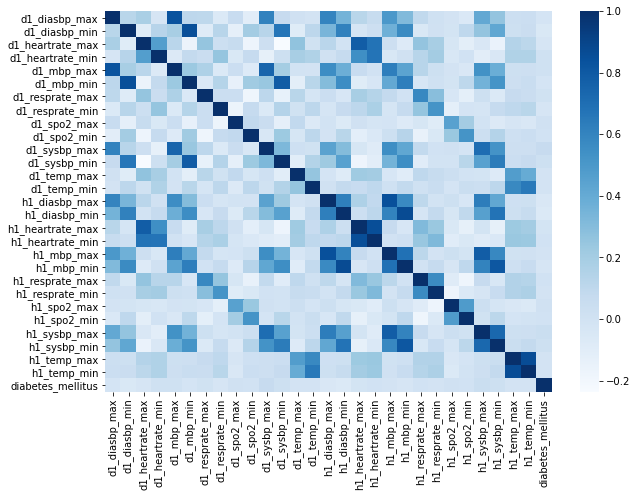

In [273]:
vitals_diabetes = vitals_labeled.join(labeled_data['diabetes_mellitus'])
plt.figure(figsize = (10, 7))
sns.heatmap(vitals_diabetes.corr(), cmap = 'Blues')
plt.show()
display(vitals_diabetes.corr().style.background_gradient(cmap='Blues'))

## 6. Labs, Labs blood and Vitals: Data Quality verification

All the labs, labs blood gas and vitals vars have a minimum and max value for the first hour and for the first 24 hours. So let's see if there is any min value that is higher than the max (and swap them in that case), and if there is any value for the first hour that is higher (if maximum) or lower (if minimum) than the value for the first 24 hours (and, in that case, replace the daily value with the hourly one).

**6.1 min > max check**

In [274]:
min_max_vars = labs_vars + labs_blood_vars + vitals_vars

min_max_d_h = []
for var in min_max_vars:
    if var[:-4] not in min_max_d_h:
        min_max_d_h.append(var[:-4])

#checking if there is minimum values higher than maximum values
for l in min_max_d_h:
    labeled_data[f"{l}_min>max"] = np.where((labeled_data[f"{l}_min"] > labeled_data[f"{l}_max"]),
                                       'PROBLEM',
                                       'OK')
    unlabeled_data[f"{l}_min>max"] = np.where((unlabeled_data[f"{l}_min"] > unlabeled_data[f"{l}_max"]),
                                       'PROBLEM',
                                       'OK')
    
    if "PROBLEM" in labeled_data[f"{l}_min>max"].value_counts().keys():
        print("Problems: ", labeled_data[f"{l}_min>max"].value_counts()["PROBLEM"])
    if "PROBLEM" in unlabeled_data[f"{l}_min>max"].value_counts().keys():
        print("Problems: ", unlabeled_data[f"{l}_min>max"].value_counts()["PROBLEM"])
        
    labeled_data.drop([f"{l}_min>max"], axis=1, inplace=True)
    unlabeled_data.drop([f"{l}_min>max"], axis=1, inplace=True)

Problems:  117
Problems:  12
Problems:  27
Problems:  3
Problems:  63
Problems:  7
Problems:  2
Problems:  3
Problems:  1
Problems:  171
Problems:  14
Problems:  70
Problems:  6
Problems:  19
Problems:  3
Problems:  4
Problems:  7
Problems:  2
Problems:  84
Problems:  89
Problems:  6
Problems:  19
Problems:  1
Problems:  15
Problems:  4
Problems:  3
Problems:  2
Problems:  21
Problems:  11
Problems:  39
Problems:  4
Problems:  19
Problems:  2
Problems:  18
Problems:  1
Problems:  29
Problems:  8
Problems:  13
Problems:  1
Problems:  9
Problems:  30
Problems:  95
Problems:  45
Problems:  48
Problems:  11
Problems:  28
Problems:  79
Problems:  8
Problems:  39
Problems:  110
Problems:  13


It is possible to see that there are many problems, so we need to find them and swap the values:

In [275]:
for l in min_max_d_h:
    labeled_data[f"{l}_min"], labeled_data[f"{l}_max"]\
    = np.where((labeled_data[f"{l}_min"] > labeled_data[f"{l}_max"]),
               [labeled_data[f"{l}_max"], labeled_data[f"{l}_min"]],
               [labeled_data[f"{l}_min"], labeled_data[f"{l}_max"]])
    
    unlabeled_data[f"{l}_min"], unlabeled_data[f"{l}_max"]\
    = np.where((unlabeled_data[f"{l}_min"] > unlabeled_data[f"{l}_max"]),
               [unlabeled_data[f"{l}_max"], unlabeled_data[f"{l}_min"]],
               [unlabeled_data[f"{l}_min"], unlabeled_data[f"{l}_max"]])

If you run the checking code again, there will be no more problems.

For the next check we will do the check and swap first and then just do a double check and see if there is still any problem.

**6.2 d1_min > h1_min or d1_max < h1_max check**

In [276]:
min_max = []
for var in min_max_vars:
    if var[3:-4] not in min_max:
        min_max.append(var[3:-4])
    
#checking if there is first hour values more extreme than first 24 hours values
for l in min_max:
    labeled_data[f"d1_{l}_min"] = np.where((labeled_data[f"d1_{l}_min"] > labeled_data[f"h1_{l}_min"]),
                                           labeled_data[f"h1_{l}_min"],
                                           labeled_data[f"d1_{l}_min"])
    labeled_data[f"d1_{l}_max"] = np.where((labeled_data[f"d1_{l}_max"] < labeled_data[f"h1_{l}_max"]),
                                           labeled_data[f"h1_{l}_max"],
                                           labeled_data[f"d1_{l}_max"])
    
    unlabeled_data[f"d1_{l}_min"] = np.where((unlabeled_data[f"d1_{l}_min"] > unlabeled_data[f"h1_{l}_min"]),
                                             unlabeled_data[f"h1_{l}_min"],
                                             unlabeled_data[f"d1_{l}_min"])
    unlabeled_data[f"d1_{l}_max"] = np.where((unlabeled_data[f"d1_{l}_max"] < unlabeled_data[f"h1_{l}_max"]),
                                             unlabeled_data[f"h1_{l}_max"],
                                             unlabeled_data[f"d1_{l}_max"])

In [277]:
#checking if there are still any problems to solve
for l in min_max:
    labeled_data[f'{l}_d1_min>h1_min'] = np.where((labeled_data[f"d1_{l}_min"] > labeled_data[f"h1_{l}_min"]),
                                       'PROBLEM',
                                       'OK')
    labeled_data[f'{l}_d1_max<h1_max'] = np.where((labeled_data[f"d1_{l}_max"] < labeled_data[f"h1_{l}_max"]),
                                       'PROBLEM',
                                       'OK')
    
    unlabeled_data[f'{l}_d1_min>h1_min'] = np.where((unlabeled_data[f"d1_{l}_min"] > unlabeled_data[f"h1_{l}_min"]),
                                       'PROBLEM',
                                       'OK')
    unlabeled_data[f'{l}_d1_max<h1_max'] = np.where((unlabeled_data[f"d1_{l}_max"] < unlabeled_data[f"h1_{l}_max"]),
                                       'PROBLEM',
                                       'OK')
    
    if "PROBLEM" in labeled_data[f'{l}_d1_min>h1_min'].value_counts().keys():
        print("Problems: ", labeled_data[f'{l}_d1_min>h1_min'].value_counts()["PROBLEM"])
    if "PROBLEM" in labeled_data[f'{l}_d1_max<h1_max'].value_counts().keys():
        print("Problems: ", labeled_data[f'{l}_d1_max<h1_max'].value_counts()["PROBLEM"])
        
    if "PROBLEM" in unlabeled_data[f'{l}_d1_min>h1_min'].value_counts().keys():
        print("Problems: ", unlabeled_data[f'{l}_d1_min>h1_min'].value_counts()["PROBLEM"])
    if "PROBLEM" in unlabeled_data[f'{l}_d1_max<h1_max'].value_counts().keys():
        print("Problems: ", unlabeled_data[f'{l}_d1_max<h1_max'].value_counts()["PROBLEM"])
        
    labeled_data.drop([f'{l}_d1_min>h1_min'], axis=1, inplace=True)
    labeled_data.drop([f'{l}_d1_max<h1_max'], axis=1, inplace=True)
    unlabeled_data.drop([f'{l}_d1_min>h1_min'], axis=1, inplace=True)
    unlabeled_data.drop([f'{l}_d1_max<h1_max'], axis=1, inplace=True)

## 7. Labs, Labs blood and Vitals: Data Exploration

The Labs, Labs blood gas and Vitals vars have a minimum and maximum value for the first hour and the first 24 hours for all variables. So, we can create **diff** and **mean** variables, which represent, respectively, the difference and the average between the maximum value and the minimum.

In [278]:
for var in min_max_d_h:
    
    labeled_data[f"{var}_diff"] = labeled_data[f"{var}_max"] - labeled_data[f"{var}_min"]
    labeled_data[f"{var}_mean"] = (labeled_data[f"{var}_max"] + labeled_data[f"{var}_min"]) / 2
   
    unlabeled_data[f"{var}_diff"] = unlabeled_data[f"{var}_max"] - unlabeled_data[f"{var}_min"]
    unlabeled_data[f"{var}_mean"] = (unlabeled_data[f"{var}_max"] + unlabeled_data[f"{var}_min"]) / 2
    

In [279]:
labeled_data["d1_diasbp_mean"]

1         52.5
2         63.0
3         68.0
4         52.0
5         78.0
          ... 
130153    92.0
130154    80.0
130155    71.0
130156    62.0
130157    83.0
Name: d1_diasbp_mean, Length: 130157, dtype: float64

We can now see how they are correlated with each other again:

In [280]:
labs_vars_new = []
labs_blood_vars_new = []
vitals_vars_new = []

for var in labs_vars:
    for i in ["_diff", "_mean"]:
        if var[:-4]+i not in labs_vars_new:
            labs_vars_new.append(var[:-4]+i)

for var in labs_blood_vars:
    for i in ["_diff", "_mean"]:
        if var[:-4]+i not in labs_blood_vars_new:
            labs_blood_vars_new.append(var[:-4]+i)
            
for var in vitals_vars:
    for i in ["_diff", "_mean"]:
        if var[:-4]+i not in vitals_vars_new:
            vitals_vars_new.append(var[:-4]+i)            


In [281]:
labs_labeled_new = labeled_data[labs_vars_new]
labs_unlabeled_new = unlabeled_data[labs_vars_new]

labs_blood_labeled_new = labeled_data[labs_blood_vars_new]
labs_blood_unlabeled_new = unlabeled_data[labs_blood_vars_new]

vitals_labeled_new = labeled_data[vitals_vars_new]
vitals_unlabeled_new = unlabeled_data[vitals_vars_new]

### 7.1 Correlation

Let's check the correlation again, to see if there are substantial different coefficients:

We'll just plot the heatmaps at this point, to have a general idea of the scenario

**7.1.1 Labs**

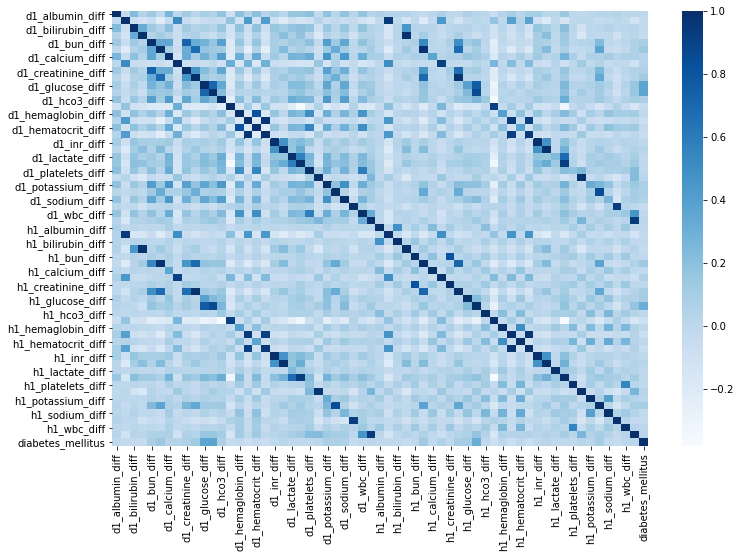

In [282]:
labs_diabetes_new = labs_labeled_new.join(labeled_data['diabetes_mellitus'])
plt.figure(figsize = (12, 8))
sns.heatmap(labs_diabetes_new.corr(), cmap = 'Blues')
plt.show()
# display(labs_diabetes_new.corr().style.background_gradient(cmap='Blues'))

Again, it's possible to see an high correlation between the values of the "first 24 hours" and "first hour" in most of the labs variables, like for example `h1_albumin_diff` and `d1_albumin_diff` .

**7.1.2 Labs blood gas**

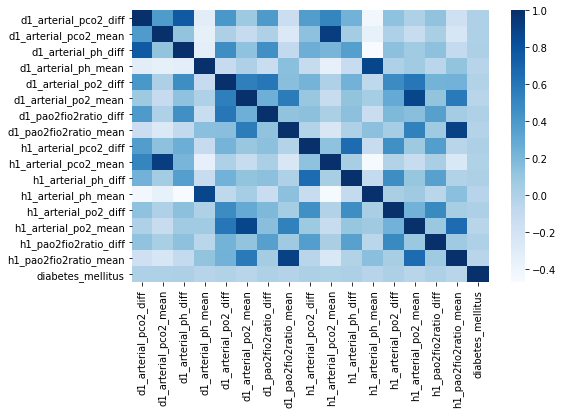

In [283]:
labs_blood_diabetes_new = labs_blood_labeled_new.join(labeled_data['diabetes_mellitus'])
plt.figure(figsize = (8, 5))
sns.heatmap(labs_blood_diabetes_new.corr(), cmap = 'Blues')
plt.show()
# display(labs_diabetes_new.corr().style.background_gradient(cmap='Blues'))

Regarding the labs blood gas variables we can check the same relation between the "first 24 hours" and "first hour" variables. 

**7.1.3 Vitals**

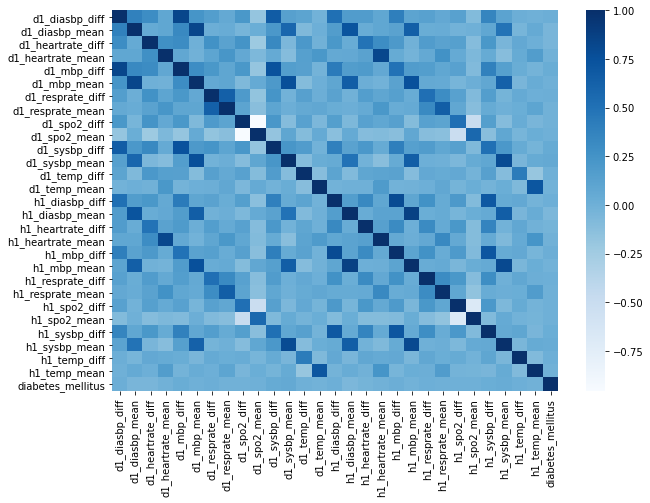

In [284]:
vitals_diabetes_new = vitals_labeled_new.join(labeled_data['diabetes_mellitus'])
plt.figure(figsize = (10, 7))
sns.heatmap(vitals_diabetes_new.corr(), cmap = 'Blues')
plt.show()
# display(labs_diabetes_new.corr().style.background_gradient(cmap='Blues'))

There are still not a high correlation between these variables and the contraction of diabetes (except the glucose). However, these correlations can be useful to fill missing values on some columns based on others that have a similar behaviour (a high correlation coefficient).

**7.1.4 Relate vitals to demographic**

To try to get some more conclusions we checked the relation between the vitals variables and demographic variables.

In [285]:
labeled_data['gender_code'] = np.where(labeled_data['gender']=='F',0,1)

In [286]:
vitals_vars_new

['d1_diasbp_diff',
 'd1_diasbp_mean',
 'd1_heartrate_diff',
 'd1_heartrate_mean',
 'd1_mbp_diff',
 'd1_mbp_mean',
 'd1_resprate_diff',
 'd1_resprate_mean',
 'd1_spo2_diff',
 'd1_spo2_mean',
 'd1_sysbp_diff',
 'd1_sysbp_mean',
 'd1_temp_diff',
 'd1_temp_mean',
 'h1_diasbp_diff',
 'h1_diasbp_mean',
 'h1_heartrate_diff',
 'h1_heartrate_mean',
 'h1_mbp_diff',
 'h1_mbp_mean',
 'h1_resprate_diff',
 'h1_resprate_mean',
 'h1_spo2_diff',
 'h1_spo2_mean',
 'h1_sysbp_diff',
 'h1_sysbp_mean',
 'h1_temp_diff',
 'h1_temp_mean']

In [287]:
data = labeled_data[['gender_code','age_bin','bmi_class_encoder','d1_diasbp_diff',
 'd1_diasbp_mean',
 'd1_heartrate_diff',
 'd1_heartrate_mean',
 'd1_mbp_diff',
 'd1_mbp_mean',
 'd1_resprate_diff',
 'd1_resprate_mean',
 'd1_spo2_diff',
 'd1_spo2_mean',
 'd1_sysbp_diff',
 'd1_sysbp_mean',
 'd1_temp_diff',
 'd1_temp_mean',
 'h1_diasbp_diff',
 'h1_diasbp_mean',
 'h1_heartrate_diff',
 'h1_heartrate_mean',
 'h1_mbp_diff',
 'h1_mbp_mean',
 'h1_resprate_diff',
 'h1_resprate_mean',
 'h1_spo2_diff',
 'h1_spo2_mean',
 'h1_sysbp_diff',
 'h1_sysbp_mean',
 'h1_temp_diff',
 'h1_temp_mean']]

In [288]:
d1=data.corr().iloc[:3,:]

In [289]:
d1

gender_code   age_bin  bmi_class_encoder  d1_diasbp_diff  \
gender_code            1.00000 -0.046450           0.007050       -0.063291   
age_bin               -0.04645  1.000000          -0.085761        0.086096   
bmi_class_encoder      0.00705 -0.085761           1.000000        0.027798   

                   d1_diasbp_mean  d1_heartrate_diff  d1_heartrate_mean  \
gender_code              0.083443           0.001594          -0.043152   
age_bin                 -0.170245          -0.024441          -0.159884   
bmi_class_encoder        0.045138          -0.050367          -0.035998   

                   d1_mbp_diff  d1_mbp_mean  d1_resprate_diff  ...  \
gender_code          -0.051994     0.056877         -0.010371  ...   
age_bin               0.105838    -0.081925          0.005310  ...   
bmi_class_encoder     0.033916     0.066658          0.010632  ...   

                   h1_mbp_diff  h1_mbp_mean  h1_resprate_diff  \
gender_code          -0.023338     0.053280         -0.006992   
age_bin               0.054883    -0.104309         -0.003551   
bmi_class_encoder     0.022423     0.048431          0.009171   

                   h1_resprate_mean  h1_spo2_diff  h1_spo2_mean  \
gender_code               -0.038693     -0.009425     -0.000390   
age_bin                    0.043096      0.051805     -0.084833   
bmi_class_encoder         -0.015877     -0.003746     -0.033743   

                   h1_sysbp_diff  h1_sysbp_mean  h1_temp_diff  h1_temp_mean  
gender_code            -0.013207       0.006161      0.003875      0.002706  
age_bin                 0.075462       0.017625     -0.007718     -0.086150  
bmi_class_encoder       0.014392       0.062210     -0.005468      0.030418  

[3 rows x 31 columns]

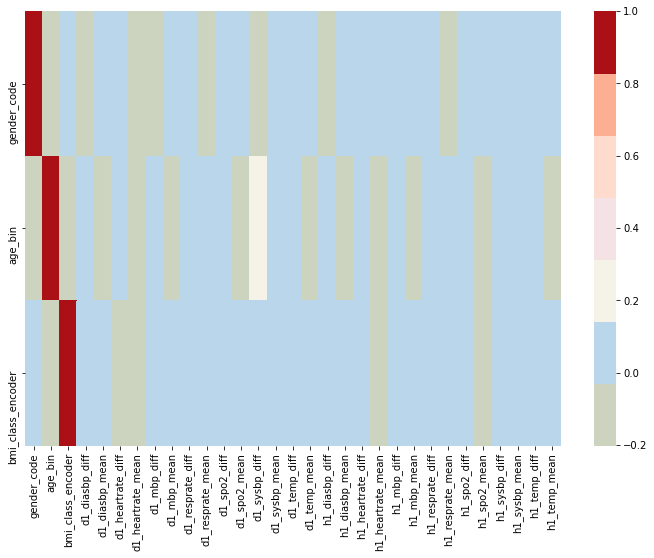

In [290]:
plt.figure(figsize=(12,8))
sns.heatmap(d1,cmap=colors)

There is a negative correlation between the bmi bin and the heartrate, meaning that younger people can have a higher heart rate; as well as between the age bin and the diasbp, which is used to calculate the blood pressure. These can be relevant factors to understand the demographic effects on the labs and vitals results, however, the correlation is not strong enough to draw definite conclusions.



**7.1.5 Glucose**

Let's create categorical variables for the levels of glucose (based on the division suggested in this website: https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/diagnosis-treatment/drc-20351199 - Fasting blood sugar test)

In [330]:
def glucose_bin(glucose):
    
    if glucose < 140: 
        return "normal"
    elif glucose <= 199: 
        return "pre_diabetes"
    elif glucose > 140:
        return "diabetes"

In [334]:
def glucose_encoder(glucose):
    
    if glucose < 140: 
        return 0
    elif glucose < 200: 
        return 1
    elif glucose >= 200:
        return 2

In [332]:
labeled_data['glucose_class'] = labeled_data['d1_glucose_mean'].apply(glucose_bin)

labeled_data['glucose_class_encoder'] = labeled_data['d1_glucose_mean'].apply(glucose_encoder)

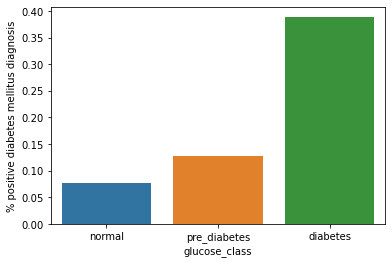

In [333]:
y= ((labeled_data.groupby(['glucose_class', 'glucose_class_encoder']).sum()) /\
    (labeled_data.groupby(['glucose_class', 'glucose_class_encoder']).count()))\
    ['diabetes_mellitus'].reset_index().sort_values("glucose_class_encoder")

sns.barplot(x=y['glucose_class'], y=y['diabetes_mellitus'])
plt.ylabel("% positive diabetes mellitus diagnosis")
plt.show()



Effectively, we can see that the levels of glucose are highly correlated with the contraction of diabetes. Although some people with normal blood glucose levels can also be diagnosed with diabetes mellitus, there is a much higher probability when the glucose levels are higher than recommended.

In [325]:
np.sum(labeled_data[labeled_data.glucose_class == "diabetes"]["diabetes_mellitus"])

22424

In [324]:
labeled_data[labeled_data.glucose_class == "diabetes"]["diabetes_mellitus"]

1         1
2         1
4         0
6         1
7         1
         ..
130151    0
130152    0
130154    0
130155    1
130156    0
Name: diabetes_mellitus, Length: 67967, dtype: int64

## 8. APACHE covariate

APACHE (acute physiology and chronic health evaluation) is a severity-of-illness classification system for describing groups of intensive care unit (ICU) patients and evaluating their care. These are another type of variables in our dataset.

In [119]:
apache_cov = data_dic.loc[data_dic.Category == "APACHE covariate"]
display(apache_cov)
apache_cov_vars = apache_cov["Variable Name"].to_list()

Category          Variable Name         Unit of Measure Data Type  \
17  APACHE covariate         albumin_apache                     g/L   numeric   
18  APACHE covariate     apache_2_diagnosis                    None    string   
19  APACHE covariate    apache_3j_diagnosis                    None    string   
20  APACHE covariate  apache_post_operative                    None    binary   
21  APACHE covariate             arf_apache                    None    binary   
22  APACHE covariate       bilirubin_apache              micromol/L   numeric   
23  APACHE covariate             bun_apache                  mmol/L   numeric   
24  APACHE covariate      creatinine_apache              micromol/L   numeric   
25  APACHE covariate            fio2_apache                Fraction   numeric   
26  APACHE covariate        gcs_eyes_apache                    None   integer   
27  APACHE covariate       gcs_motor_apache                    None   integer   
28  APACHE covariate      gcs_unable_apache                    None    binary   
29  APACHE covariate      gcs_verbal_apache                    None   integer   
30  APACHE covariate         glucose_apache                  mmol/L   numeric   
31  APACHE covariate      heart_rate_apache        Beats per minute   numeric   
32  APACHE covariate      hematocrit_apache                Fraction   numeric   
33  APACHE covariate       intubated_apache                    None    binary   
34  APACHE covariate             map_apache  Millimetres of mercury   numeric   
35  APACHE covariate           paco2_apache  Millimetres of mercury   numeric   
36  APACHE covariate    paco2_for_ph_apache  Millimetres of mercury   numeric   
37  APACHE covariate            pao2_apache  Millimetres of mercury   numeric   
38  APACHE covariate              ph_apache                    None   numeric   
39  APACHE covariate        resprate_apache      Breaths per minute   numeric   
40  APACHE covariate          sodium_apache                  mmol/L   numeric   
41  APACHE covariate            temp_apache         Degrees Celsius   numeric   
42  APACHE covariate     urineoutput_apache             Millilitres   numeric   
43  APACHE covariate      ventilated_apache                    None    binary   
44  APACHE covariate             wbc_apache                  10^9/L   numeric   

                                                                                                                                                                                                                                                                       Description  \
17                                                                                                                                                                      The albumin concentration measured during the first 24 hours which results in the highest APACHE III score   
18                                                                                                                                                                                                                                   The APACHE II diagnosis for the ICU admission   
19                                                                                                                                                                                       The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission   
20                                                                                                                                                                                                          The APACHE operative status; 1 for post-operative, 0 for non-operative   
21                                                                                         Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialys

In [120]:
apache_cov_labeled = labeled_data[apache_cov_vars]
apache_cov_unlabeled = unlabeled_data[apache_cov_vars]

### 8.1 Data Quality verification

**8.1.1 Missing Values Checking**

In [121]:
a = (apache_cov_labeled.isnull().sum() / len(apache_cov_labeled) * 100)
b = (apache_cov_unlabeled.isnull().sum() / len(apache_cov_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% labeled data null values", ascending = False)

display(null_values)

% labeled data null values  \
fio2_apache                             76.615165   
ph_apache                               76.615165   
pao2_apache                             76.615165   
paco2_for_ph_apache                     76.615165   
paco2_apache                            76.615165   
bilirubin_apache                        63.431087   
albumin_apache                          60.052859   
urineoutput_apache                      48.531389   
wbc_apache                              22.645728   
hematocrit_apache                       20.558249   
bun_apache                              19.523345   
creatinine_apache                       19.116913   
sodium_apache                           18.838019   
glucose_apache                          11.290979   
temp_apache                              5.079250   
gcs_motor_apache                         1.682583   
gcs_eyes_apache                          1.682583   
gcs_verbal_apache                        1.682583   
apache_2_diagnosis                       1.294590   
apache_3j_diagnosis                      0.664582   
resprate_apache                          0.620789   
gcs_unable_apache                        0.544727   
map_apache                               0.322687   
heart_rate_apache                        0.237406   
intubated_apache                         0.000000   
arf_apache                               0.000000   
apache_post_operative                    0.000000   
ventilated_apache                        0.000000   

                       % unlabeled data null values  
fio2_apache                               74.604260  
ph_apache                                 74.604260  
pao2_apache                               74.604260  
paco2_for_ph_apache                       74.604260  
paco2_apache                              74.604260  
bilirubin_apache                          61.657221  
albumin_apache                            59.165527  
urineoutput_apache                        50.713309  
wbc_apache                                23.216729  
hematocrit_apache                         20.656635  
bun_apache                                20.138753  
creatinine_apache                         19.962869  
sodium_apache                             19.474301  
glucose_apache                            11.823334  
temp_apache                                6.556576  
gcs_motor_apache                           2.003127  
gcs_eyes_apache                            2.003127  
gcs_verbal_apache                          2.003127  
apache_2_diagnosis                         1.661130  
apache_3j_diagnosis                        1.055306  
resprate_apache                            0.625366  
gcs_unable_apache                          0.596052  
map_apache                                 0.508110  
heart_rate_apache                          0.293141  
intubated_apache                           0.000000  
arf_apache                                 0.000000  
apache_post_operative                      0.000000  
ventilated_apache                          0.000000

There are some variables with a lot of missing values on the APACHE Covariate variables. In the next step of our project (model preparation), we define a threshold and a strategy to deal with all of these missing values.

**8.1.2 Removing unnecessary columns**

In [122]:
for i, col_1 in enumerate(apache_cov_labeled.columns):
    for col_2 in apache_cov_labeled.columns[(i+1):]:
        if apache_cov_labeled[col_1].equals(apache_cov_labeled[col_2]):
            print("%s and %s are identical." % (col_1, col_2))

paco2_apache and paco2_for_ph_apache are identical.


`paco2_apache` and `paco2_for_ph_apache` are identical columns, so let's drop one of them from the APACHE comorbidity variabels

Let's drop the `paco2_for_ph_apache`:

In [123]:
labeled_data.drop(["paco2_for_ph_apache"], axis=1, inplace=True)
unlabeled_data.drop(["paco2_for_ph_apache"], axis=1, inplace=True)

apache_cov_vars.remove("paco2_for_ph_apache")

### 8.2 APACHE Covariate data description

In [124]:
apache_cov_labeled

albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
1                  2.3               113.0               502.01   
2                  NaN               108.0               203.01   
3                  NaN               122.0               703.03   
4                  NaN               203.0              1206.03   
5                  NaN               119.0               601.01   
...                ...                 ...                  ...   
130153             NaN               110.0               104.01   
130154             3.5               105.0               207.01   
130155             NaN               114.0               102.01   
130156             NaN               124.0               306.01   
130157             NaN               105.0               207.01   

        apache_post_operative  arf_apache  bilirubin_apache  bun_apache  \
1                           0           0               0.4        31.0   
2                           0           0               NaN         9.0   
3                           0           0               NaN         NaN   
4                           1           0               NaN         NaN   
5                           0           0               NaN         NaN   
...                       ...         ...               ...         ...   
130153                      0           0               NaN         NaN   
130154                      0           0               0.7        32.0   
130155                      0           0               NaN        30.0   
130156                      0           0               NaN         NaN   
130157                      0           0               NaN         NaN   

        creatinine_apache  fio2_apache  gcs_eyes_apache  ...  paco2_apache  \
1                    2.51          NaN              3.0  ...           NaN   
2                    0.56          1.0              1.0  ...          37.0   
3                     NaN          NaN              3.0  ...           NaN   
4                     NaN          0.6              4.0  ...          30.0   
5                     NaN          NaN              NaN  ...           NaN   
...                   ...          ...              ...  ...           ...   
130153                NaN          NaN              4.0  ...           NaN   
130154               1.07          NaN              4.0  ...           NaN   
130155               2.43          1.0              1.0  ...          44.0   
130156                NaN          NaN              4.0  ...           NaN   
130157                NaN          NaN              4.0  ...           NaN   

        paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
1                       NaN          NaN        NaN             36.0   
2                      37.0         51.0      7.450             33.0   
3                       NaN          NaN        NaN             37.0   
4                      30.0        142.0      7.390              4.0   
5                       NaN          NaN        NaN             16.0   
...                     ...          ...        ...              ...   
130153                  NaN          NaN        NaN             50.0   
130154                  NaN          NaN        NaN             42.0   
130155                 44.0         80.0      7.224             34.0   
130156                  NaN          NaN        NaN             31.0   
130157                  NaN          NaN        NaN             57.0   

        sodium_apache  temp_apache  urineoutput_apache  ventilated_apache  \
1               134.0         39.3                 NaN                  0   
2               145.0         35.1                 NaN                  1   
3                 NaN         36.7                 NaN                  0   
4                 NaN         34.8                 NaN                  1   
5                 NaN         36.7                 NaN                  0   
...               ...          ...    

In [125]:
apache_cov_labeled.describe()

albumin_apache  apache_2_diagnosis  apache_3j_diagnosis  \
count    51994.000000       128472.000000        129292.000000   
mean         2.886149          185.492683           565.994296   
std          0.689812           85.858208           466.510850   
min          1.200000          101.000000             0.010000   
25%          2.400000          113.000000           204.010000   
50%          2.900000          122.000000           409.020000   
75%          3.400000          301.000000           703.030000   
max          4.600000          308.000000          2201.050000   

       apache_post_operative     arf_apache  bilirubin_apache     bun_apache  \
count          130157.000000  130157.000000      47597.000000  104746.000000   
mean                0.207111       0.027997          1.201222      25.718070   
std                 0.405238       0.164965          2.351994      20.690041   
min                 0.000000       0.000000          0.100000       4.000000   
25%                 0.000000       0.000000          0.400000      13.000000   
50%                 0.000000       0.000000          0.700000      19.000000   
75%                 0.000000       0.000000          1.100000      31.000000   
max                 1.000000       1.000000         60.200000     127.000000   

       creatinine_apache   fio2_apache  gcs_eyes_apache  ...  paco2_apache  \
count      105275.000000  30437.000000    127967.000000  ...  30437.000000   
mean            1.481629      0.595735         3.488290  ...     42.161246   
std             1.543535      0.262922         0.939831  ...     12.267414   
min             0.300000      0.210000         1.000000  ...     18.000000   
25%             0.710000      0.400000         3.000000  ...     34.500000   
50%             0.970000      0.500000         4.000000  ...     40.000000   
75%             1.530000      0.850000         4.000000  ...     47.000000   
max            11.180000      1.000000         4.000000  ...     95.000000   

       paco2_for_ph_apache   pao2_apache     ph_apache  resprate_apache  \
count         30437.000000  30437.000000  30437.000000    129349.000000   
mean             42.161246    132.061737      7.352154        25.150603   
std              12.267414     84.958826      0.098423        15.024730   
min              18.000000     31.000000      6.960540         4.000000   
25%              34.500000     77.000000      7.301000        11.000000   
50%              40.000000    104.000000      7.360000        27.000000   
75%              47.000000    156.000000      7.414000        36.000000   
max              95.000000    498.000000      7.590000        60.000000   

       sodium_apache    temp_apache  urineoutput_apache  ventilated_apache  \
count   105638.00000  123546.000000        66990.000000      130157.000000   
mean       137.94526      36.420638         1800.803417           0.330432   
std          5.30384       0.857584         1456.551481           0.470370   
min        117.00000      32.100000            0.000000           0.000000   
25%        135.00000      36.200000          799.048800           0.000000   
50%        138.00000      36.500000         1454.976000           0.000000   
75%        141.00000      36.700000         2415.096000           1.000000   
max        158.00000      39.700000         8716.669632           1.000000   

          wbc_apache  
count  100682.000000  
mean       12.187662  
std         6.931023  
min         0.900000  
25%         7.500000  
50%        10.470000  
75%        15.300000  
max        45.800000  

[8 rows x 28 columns]

This description is just a brief understanding of some of the main statistics of those variables.

### 8.3 Correlation

*Showl*

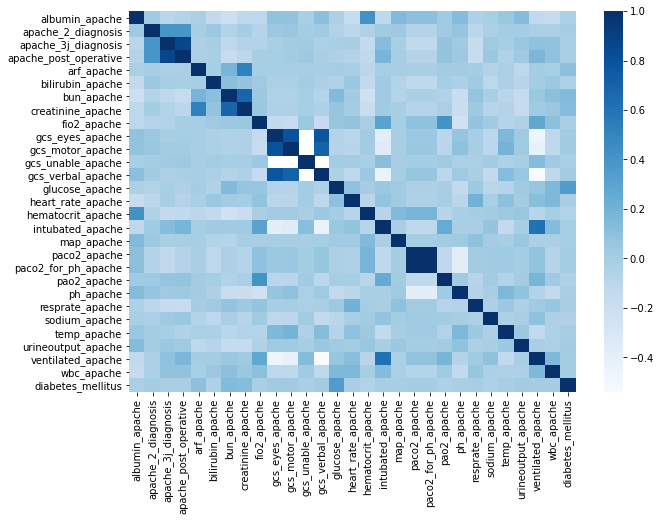

In [126]:
apachecov_diabetes = apache_cov_labeled.join(labeled_data['diabetes_mellitus'])
plt.figure(figsize = (10, 7))
sns.heatmap(apachecov_diabetes.corr(), cmap = 'Blues')
plt.show()
display(apachecov_diabetes.corr().style.background_gradient(cmap='Blues'))

There seems to be a very low correlation with the positive test for diabetes and the apache variables in general.
However, and as expected, `glucose_apache` is the variable with the highest correlation with the contraction of diabetes.

We will also focus our analysis on the apache diagnosis variables (`apache_2_diagnosis` and `apache_3j_diagnosis`), to see if they can help predicting diabetes mellitus contraction.

### 8.4 Data Exploration

APACHE II diagnosis and APACHE IIIj diagnosis contain redundant information. As APACHE IIIj diagnosis contains more detailed, we will use that variable. 

`apache_3j_diagnosis`, as stated in the data dictionary, is a code which best describes the reason for the ICU admission.

**8.4.1 Diabetic Ketoacidosis**

https://www.kaggle.com/danofer/apache-iiij-icu-diagnosis-codes?select=icu-apache-codes-ANZICS.csv

702 is the APACHE 3J Diagnosis code that corresponds to diabetic ketoacidosis (you can check it in the linke provided above). Thus, we will create this feature. However, as we well see, not all patients with diabetic ketoacidosis are marked with diabetes mellitus.

In [127]:
#As the apache_3j_diagnosis has not many missing values, and the value 0 doesn't state for any disease,
#we will fill the nan values with 0's. We'll also convert the codes to int values so that we can analyse them later

labeled_data["apache_3j_diagnosis"] = (labeled_data.apache_3j_diagnosis).fillna(0).astype(int)
unlabeled_data["apache_3j_diagnosis"] = (unlabeled_data.apache_3j_diagnosis).fillna(0).astype(int)

In [128]:
labeled_data['apache_diabetic_ketoacidosis'] = labeled_data.apache_3j_diagnosis.apply(lambda x: 1 if x == 702 else 0)
unlabeled_data['apache_diabetic_ketoacidosis'] = unlabeled_data.apache_3j_diagnosis.apply(lambda x: 1 if x == 702 else 0)

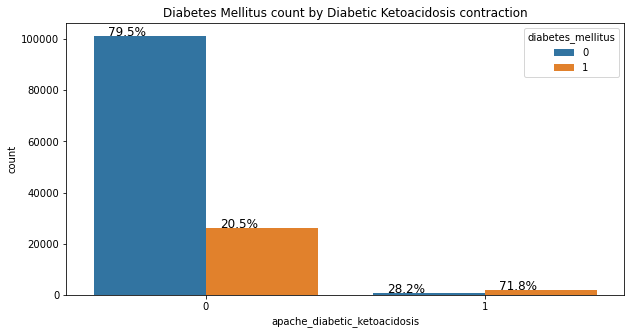

In [129]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = "apache_diabetic_ketoacidosis", hue = "diabetes_mellitus", data = labeled_data)
plt.title("Diabetes Mellitus count by Diabetic Ketoacidosis contraction")
with_hue(ax, labeled_data.apache_diabetic_ketoacidosis, 2, 2)

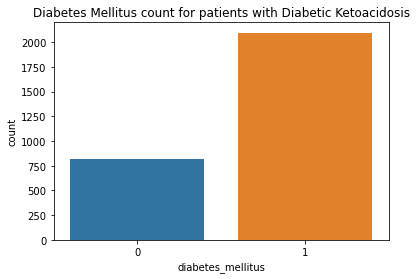

In [130]:
diabetic_ketoacidosis_df = labeled_data[labeled_data.apache_diabetic_ketoacidosis == 1]
sns.countplot(x =diabetic_ketoacidosis_df.diabetes_mellitus)
plt.title("Diabetes Mellitus count for patients with Diabetic Ketoacidosis")
plt.show()

In [131]:
labeled_data['apache_diabetic_ketoacidosis'].value_counts()

0    127239
1      2918
Name: apache_diabetic_ketoacidosis, dtype: int64

We see that there are not many patients with diabetic ketoacidosis, so the analysis is not very representative. However, the rate of diabetes mellitus contraction is much higher for those who have contracted diabetic ketoacidosis than for the ones who haven't, so this can be a useful feature for further analysis.

**8.4.2 Apache and Labs & Vitals**

There are some variables that are present in both APACHE and Labs or Vitals columns. Let's see how they relate to each other:

In [132]:
labs_vitals = []

for var in min_max_vars:
    v = "".join(var.split("_")[1:-1])
    if v not in labs_vitals:
        labs_vitals.append(v) 
        
apaches = []

for var in apache_cov_vars:
    if var.endswith("apache"):
        v = "".join(var.split("_")[:-1])
        if v not in apaches:
            apaches.append(v)        

common_vars = [var for var in apaches if var in labs_vitals]
common_vars

['albumin',
 'bilirubin',
 'bun',
 'creatinine',
 'glucose',
 'heartrate',
 'hematocrit',
 'resprate',
 'sodium',
 'temp',
 'wbc']

*Showl*

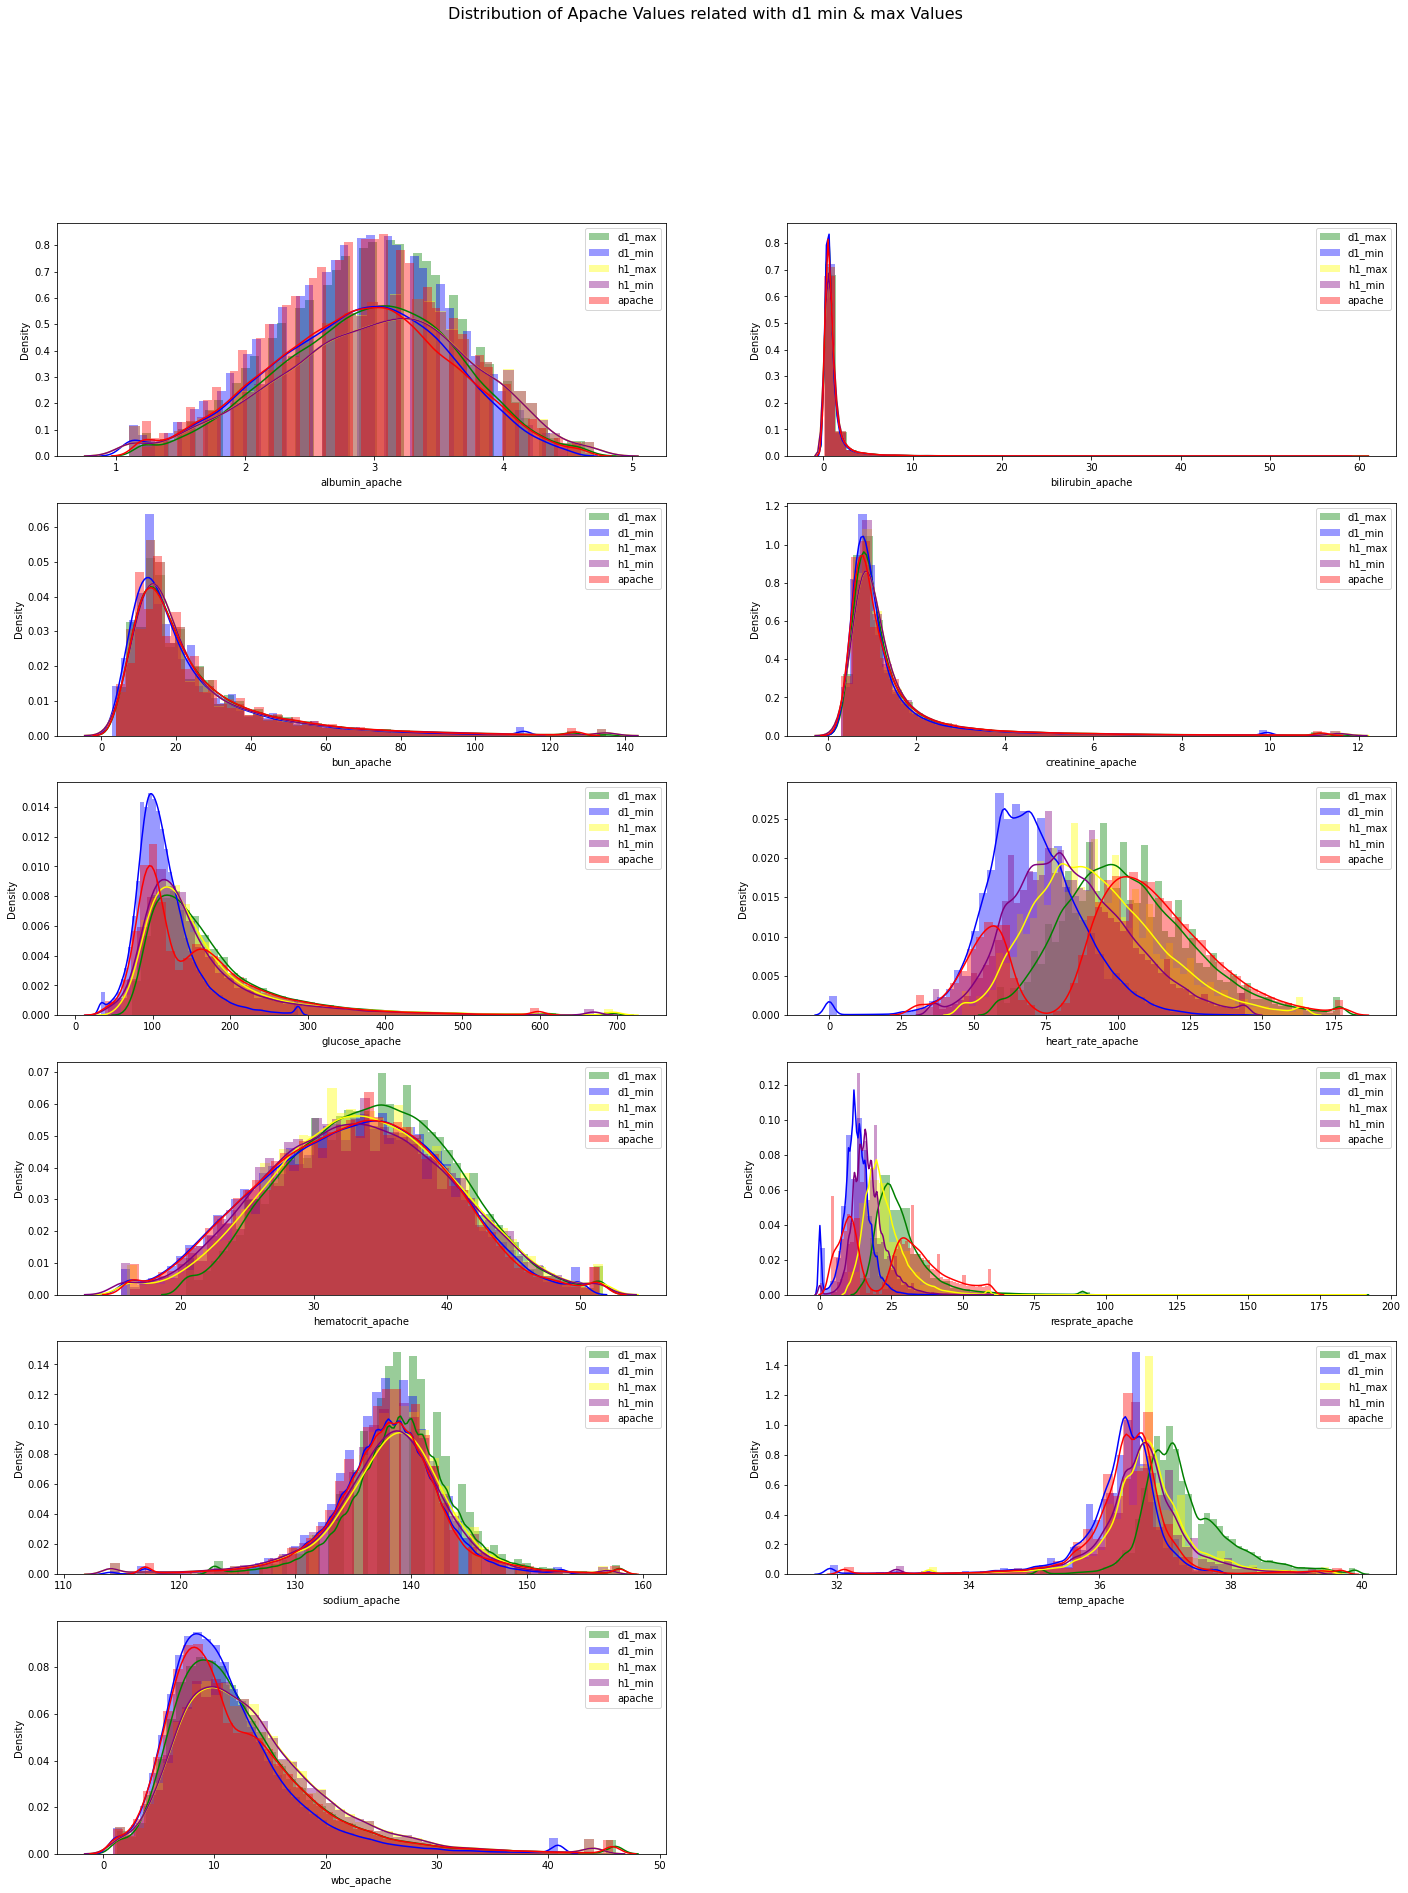

In [133]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(24, 30))
fig.suptitle('Distribution of Apache Values related with d1 min & max Values', fontsize=16)

k = 0
j = 0
for i, c in enumerate(common_vars):
    k = (k+1) if j == 1 else k
    j = i% 2
    
    sns.distplot(labeled_data[f"d1_{c}_max"], ax=ax[k, j], label = 'd1_max', color='green')
    sns.distplot(labeled_data[f"d1_{c}_min"], ax=ax[k, j], label = 'd1_min', color='blue')
    sns.distplot(labeled_data[f"h1_{c}_max"], ax=ax[k, j], label = 'h1_max', color='yellow')
    sns.distplot(labeled_data[f"h1_{c}_min"], ax=ax[k, j], label = 'h1_min', color='purple')
    if c == "heartrate":
        c = "heart_rate"
    sns.distplot(labeled_data[f"{c}_apache"], ax=ax[k, j], label = 'apache', color='red')
    ax[k, j].legend()

fig.delaxes(ax[5,1])
plt.show()

By looking at the plots above, we can see that there are some variables with identical distribution for the `apache` and the respective `labs` or `vitals` variables.

Those variables are: `albumin`, `bilirubin`, `bun`, `creatine`, `hemocrit` and `sodium`

Thus, when dealing with the missing values, we can use this relation to fill some Labs or Vitals columns based on the apache values, and vice-versa.

## 9. APACHE comorbidity

The last type of variable is the APACHE comorbidity. These variables are used to characterize the health history of the patient.  

In [134]:
apache_com = data_dic.loc[data_dic.Category == "APACHE comorbidity"]
display(apache_com)
apache_com_vars = apache_com["Variable Name"].to_list()

Category                Variable Name Unit of Measure  \
173  APACHE comorbidity                         aids            None   
174  APACHE comorbidity                    cirrhosis            None   
175  APACHE comorbidity              hepatic_failure            None   
176  APACHE comorbidity            immunosuppression            None   
177  APACHE comorbidity                     leukemia            None   
178  APACHE comorbidity                     lymphoma            None   
179  APACHE comorbidity  solid_tumor_with_metastasis            None   

    Data Type  \
173    binary   
174    binary   
175    binary   
176    binary   
177    binary   
178    binary   
179    binary   

                                                                                                                                                                                                                                                                                                                 Description  \
173                                                                                                                                                                                                    Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)   
174                                    Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.   
175                                                                                                                                                                       Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.   
176  Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).   
177                                                                                                                                                                           Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.   
178                                                                                                                                                                                                                                                        Whether the patient has been diagnosed with non-Hodgkin lymphoma.   
179                                                                                                                                                                                   Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.   

    Example  
173       1  
174       1  
175       1  
176       1  
177       1  
178       1  
179       1

In [135]:
apache_com_labeled = labeled_data[apache_com_vars]
apache_com_unlabeled = unlabeled_data[apache_com_vars]

### 9.1 Data Quality verification

**9.1.1 Handling Missing Values**

In [136]:
a = (apache_com_labeled.isnull().sum() / len(apache_com_labeled) * 100)
b = (apache_com_unlabeled.isnull().sum() / len(apache_com_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% unlabeled data null values", ascending = False)

display(null_values)

% labeled data null values  \
aids                                                0.0   
cirrhosis                                           0.0   
hepatic_failure                                     0.0   
immunosuppression                                   0.0   
leukemia                                            0.0   
lymphoma                                            0.0   
solid_tumor_with_metastasis                         0.0   

                             % unlabeled data null values  
aids                                                  0.0  
cirrhosis                                             0.0  
hepatic_failure                                       0.0  
immunosuppression                                     0.0  
leukemia                                              0.0  
lymphoma                                              0.0  
solid_tumor_with_metastasis                           0.0

There are no missing values on the APACHE comorbidity variables

**9.1.2 Removing unnecessary columns**

In this case, it is not necessary to remove any column from the APACHE comorbidity variables set

### 9.2 APACHE Comorbidity data description

In [137]:
apache_com_labeled

aids  cirrhosis  hepatic_failure  immunosuppression  leukemia  \
1          0          0                0                  0         0   
2          0          0                0                  0         0   
3          0          0                0                  0         0   
4          0          0                0                  0         0   
5          0          0                0                  0         0   
...      ...        ...              ...                ...       ...   
130153     0          0                0                  0         0   
130154     0          0                0                  0         0   
130155     0          0                0                  0         0   
130156     0          0                0                  0         0   
130157     0          0                0                  0         0   

        lymphoma  solid_tumor_with_metastasis  
1              0                            0  
2              0                            0  
3              0                            0  
4              0                            0  
5              0                            0  
...          ...                          ...  
130153         0                            0  
130154         0                            0  
130155         0                            0  
130156         0                            0  
130157         0                            0  

[130157 rows x 7 columns]

In [138]:
apache_com_labeled.describe()

aids      cirrhosis  hepatic_failure  immunosuppression  \
count  130157.00000  130157.000000    130157.000000      130157.000000   
mean        0.00103       0.016081         0.013599           0.025669   
std         0.03207       0.125786         0.115819           0.158146   
min         0.00000       0.000000         0.000000           0.000000   
25%         0.00000       0.000000         0.000000           0.000000   
50%         0.00000       0.000000         0.000000           0.000000   
75%         0.00000       0.000000         0.000000           0.000000   
max         1.00000       1.000000         1.000000           1.000000   

            leukemia       lymphoma  solid_tumor_with_metastasis  
count  130157.000000  130157.000000                130157.000000  
mean        0.007307       0.004187                     0.020852  
std         0.085166       0.064574                     0.142888  
min         0.000000       0.000000                     0.000000  
25%         0.000000       0.000000                     0.000000  
50%         0.000000       0.000000                     0.000000  
75%         0.000000       0.000000                     0.000000  
max         1.000000       1.000000                     1.000000

This description is just a brief understanding of some of the main statistics of those variables.

### 9.3 Correlation

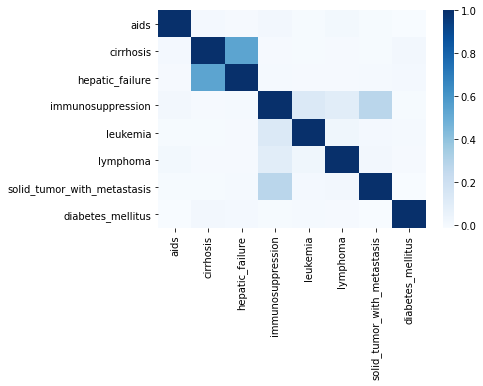

In [139]:
comordiabetes = apache_com_labeled.join(labeled_data['diabetes_mellitus'])
sns.heatmap(comordiabetes.corr(), cmap = 'Blues')
plt.show()
display(comordiabetes.corr().style.background_gradient(cmap='Blues'))

A few of the diseases seem to be correlated, ie, a person who has ever had one will more likely had the other. This is the case of chirrosis and hepatic failure for example; as well as immunosuppresion and and solid tumors with metastasis.

However, there seems to be a very low correlation with the positive test for diabetes with the contraction of any of the other diseases. Further analysis below.

### 9.4 Data Exploration

The Data Exploration will be done only using the partition of the data corresponding to the APACHE comorbidity variables

In [140]:
dic = {0: [], 1: []}

for i in apache_com_vars:    
    for j in range(2):
        dic[j].append(apache_com_labeled[i].value_counts().values[j])

print("APACHE comorbidity variables frequency distribution:\n")
pd.DataFrame.from_dict(dic, orient = "index", columns = apache_com_vars).T

APACHE comorbidity variables frequency distribution:



0     1
aids                         130023   134
cirrhosis                    128064  2093
hepatic_failure              128387  1770
immunosuppression            126816  3341
leukemia                     129206   951
lymphoma                     129612   545
solid_tumor_with_metastasis  127443  2714

0 means that the patient has not been diagnosed with the diseases.

#### Check relation between having at least one of the evaluators of the comorbidity score and diabetes

In [141]:
apache_com_vars

['aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [142]:
labeled_data["total_chronic_present"] = labeled_data[apache_com_vars].sum(axis=1)


In [143]:
labeled_data["total_chronic_present"] .unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [144]:
labeled_data["chronic_boolean"] = np.where(labeled_data["total_chronic_present"]>0,1,0)

In [145]:
labeled_data['chronic_boolean'].unique()

array([0, 1])

In [146]:
labeled_data[['chronic_boolean','diabetes_mellitus']].corr()

chronic_boolean  diabetes_mellitus
chronic_boolean           1.000000           0.002978
diabetes_mellitus         0.002978           1.000000

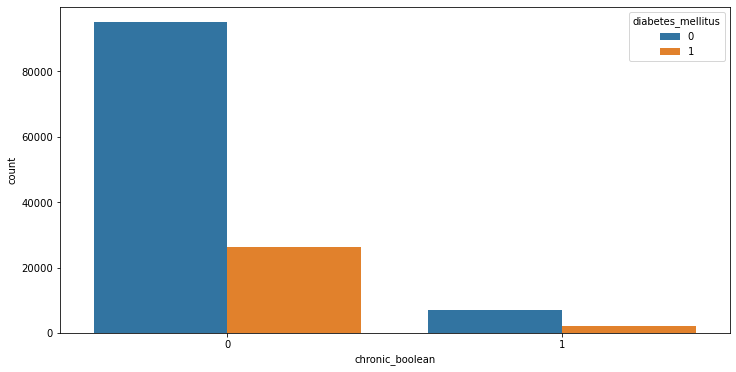

In [147]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="chronic_boolean", hue="diabetes_mellitus", data=labeled_data)

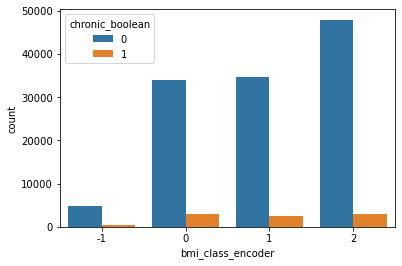

In [148]:
ax = sns.countplot(x="bmi_class_encoder", hue="chronic_boolean", data=labeled_data)

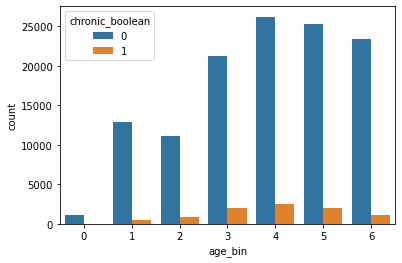

In [149]:
ax = sns.countplot(x="age_bin", hue="chronic_boolean", data=labeled_data)

The relation between having a chronic disease and not having diabetes mellitus is almost equal to the relation between having a chronic disease and having diabetes mellitus, with this we can conclude that there isn't a direct relationship between both. 

## 10. Relate blood pressure with the demographics and diabetes

Blood pressure is measured in units of millimeters of mercury (mmHg). The readings are always given in pairs, with the upper (systolic) value first, followed by the lower (diastolic) value.

https://www.ncbi.nlm.nih.gov/books/NBK279251/

- Normal blood pressure : systolic under 140 mmHg and diastolic under 90 mmHg
- High blood pressure:	systolic over 140 mmHg and/or diastolic over 90 mmHg
- Low blood pressure: systolyc under 90 and/or 60 mm Hg diastolic


In [150]:
#we will use d1_diasbp_min;d1_diasbp_max; d1_sysbp_max; d1_sysbp_min 
#because they are the evaluation of sysbp and diasp that have less missing values

In [151]:
labeled_data['sysbp_reference'] = (labeled_data['d1_sysbp_max']+labeled_data['d1_sysbp_min'])/2


In [152]:
labeled_data['diasbp_reference'] = (labeled_data['d1_diasbp_max']+labeled_data['d1_diasbp_min'])/2


In [153]:
def blood_pressure_level(sysbp, diasbp):
    if ((sysbp < 90) | (diasbp < 60)):
        return 'hipotension' 
    elif ((sysbp < 140) | (diasbp < 90)):
        return 'normal blood pressure' 
    elif ((sysbp > 140) & (diasbp > 90)):
        return 'hypertension'

def blood_pressure_level_encoder(sysbp, diasbp):
    if ((sysbp < 90) | (diasbp < 60)):
        return -1 
    elif ((sysbp < 140) | (diasbp < 90)):
        return 0 
    elif ((sysbp > 140) & (diasbp > 90)):
        return 1

In [154]:
labeled_data['blood_pressure_level'] = labeled_data[['sysbp_reference', 'diasbp_reference']].apply(lambda x: blood_pressure_level(x.sysbp_reference, x.diasbp_reference), axis=1)
labeled_data['blood_pressure_level_code'] = labeled_data[['sysbp_reference', 'diasbp_reference']].apply(lambda x: blood_pressure_level_encoder(x.sysbp_reference, x.diasbp_reference), axis=1)


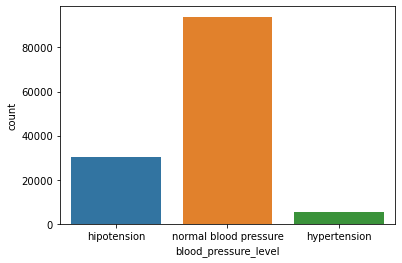

In [155]:
sns.countplot(labeled_data['blood_pressure_level'])
plt.show()

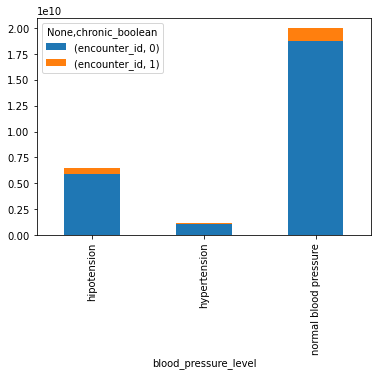

In [156]:
#relation between one of the comorbidity criterias and blood pressure
df1=labeled_data.groupby(['blood_pressure_level','chronic_boolean'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=True)
plt.show()

In [157]:
labeled_data[['chronic_boolean','blood_pressure_level_code']].corr()

chronic_boolean  blood_pressure_level_code
chronic_boolean                   1.000000                  -0.041513
blood_pressure_level_code        -0.041513                   1.000000

In [158]:
labeled_data['blood_pressure_level'] = labeled_data[['sysbp_reference', 'diasbp_reference']].apply(lambda x: blood_pressure_level(x.sysbp_reference, x.diasbp_reference), axis=1)


In [159]:
#labeled_data.columns.to_list()

In [160]:
labeled_data[['age_bin','bmi_class_encoder','diabetes_mellitus','blood_pressure_level_code']].corr()

age_bin  bmi_class_encoder  diabetes_mellitus  \
age_bin                    1.000000          -0.085761           0.063548   
bmi_class_encoder         -0.085761           1.000000           0.152406   
diabetes_mellitus          0.063548           0.152406           1.000000   
blood_pressure_level_code -0.146033           0.037781          -0.031518   

                           blood_pressure_level_code  
age_bin                                    -0.146033  
bmi_class_encoder                           0.037781  
diabetes_mellitus                          -0.031518  
blood_pressure_level_code                   1.000000

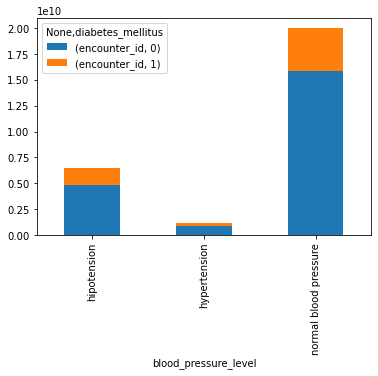

In [161]:
df1=labeled_data.groupby(['blood_pressure_level','diabetes_mellitus'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=True)
plt.show()

## 11. Relate heart rate with the demographics and diabetes

In [162]:
hearratevars=[]
for i in vitals_labeled.columns:
    if "heartrate" in i:
        hearratevars.append(i)

In [163]:
#almost no missing data
labeled_data[hearratevars].isnull().sum()/len(labeled_data)

d1_heartrate_max    0.002013
d1_heartrate_min    0.002013
h1_heartrate_max    0.031301
h1_heartrate_min    0.031301
dtype: float64

A normal resting heart rate for adults ranges from 60 to 100 beats per minute.Generally, a lower heart rate at rest implies more efficient heart function and better cardiovascular fitness. 

Normal heart rates at rest:

- Children (ages 6 - 15) 70 – 100 beats per minute; 
- Adults (age 18 and over) 60 – 100 beats per minute

https://my.clevelandclinic.org/health/diagnostics/17402-pulse--heart-rate

In [164]:
labeled_data['heartrate_reference'] = (labeled_data['d1_heartrate_max']+labeled_data['d1_heartrate_min']+labeled_data['h1_heartrate_min']+labeled_data['h1_heartrate_max'])/4


In [165]:
def heartrate_level (beats):
    if (beats<60):
        return 'low'
    elif (beats<100):
        return 'normal'
    elif (beats>100):
        return 'fast'
    


In [166]:
labeled_data['heartrate_level'] = labeled_data['heartrate_reference'].apply(heartrate_level)


In [167]:
labeled_data['heartrate_level']= np.where((labeled_data['age']<16) & (labeled_data['heartrate_reference']<70),'low',labeled_data['heartrate_level'])

In [168]:
def heartrate_level_code (level):
    if (level=='low'):
        return -1
    elif (level=='normal'):
        return 0
    elif (level=='fast'):
        return 1

In [169]:
labeled_data['heartrate_level_code'] = labeled_data['heartrate_level'].apply(heartrate_level_code)

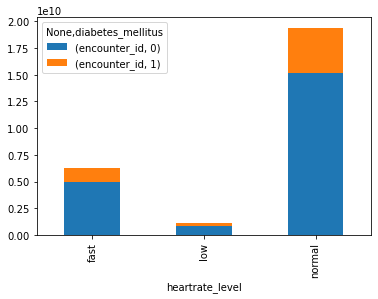

In [170]:
df1=labeled_data.groupby(['heartrate_level','diabetes_mellitus'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=True)
plt.show()

*Showl*

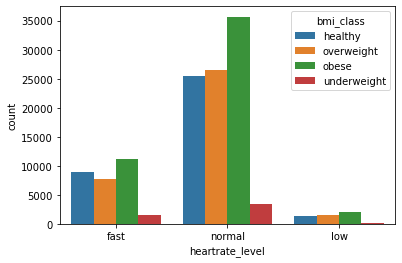

In [171]:
ax = sns.countplot(x="heartrate_level", hue="bmi_class", data=labeled_data)

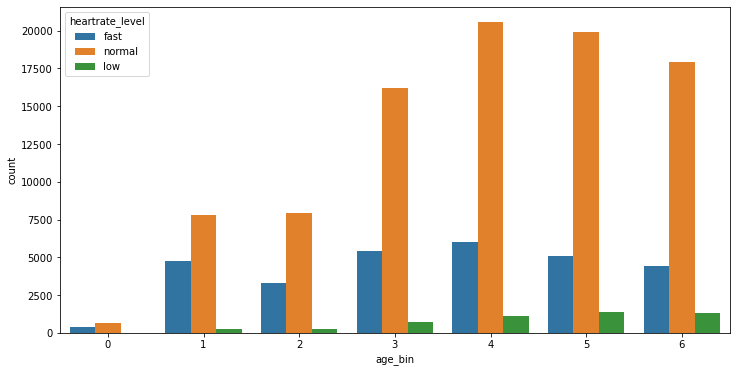

In [172]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="age_bin", hue="heartrate_level", data=labeled_data)

In [173]:
labeled_data[['chronic_boolean','heartrate_level_code']].corr()

chronic_boolean  heartrate_level_code
chronic_boolean              1.000000              0.062413
heartrate_level_code         0.062413              1.000000

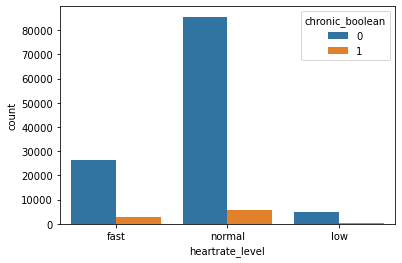

In [174]:
ax = sns.countplot(x="heartrate_level", hue="chronic_boolean", data=labeled_data)

In [175]:
labeled_data[['heartrate_level_code','chronic_boolean','blood_pressure_level_code']].corr().style.background_gradient(cmap='Blues')

In [176]:
labeled_data.to_csv("labeled_data_preprocessed.csv")
unlabeled_data.to_csv("unlabeled_data_preprocessed.csv")